In [1]:
#create numpy library
#create pandas library
#create scipy.cluster.hierarchy library for work hierarchy Dendrograms
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch

In [2]:
#create numpy library for use in plot
import matplotlib.pyplot as plt
from matplotlib import style
style.use("bmh")
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams["figure.figsize"] = 50, 20
rcParams.update({"font.size":22}) 
from matplotlib.pyplot import pie, axis, show

In [3]:
#data clean************************

In [4]:
#Read data from csv
data_ = pd.read_csv('covid_19_clean_complete .csv',parse_dates=["Date"])

In [5]:
df=data_

In [6]:
df.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [7]:
#Replace nan to 0
df['Province/State'] = df['Province/State'].fillna(0)

In [8]:
df.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0              0    Afghanistan  33.93911  67.709953 2020-01-22          0   
1              0        Albania  41.15330  20.168300 2020-01-22          0   
2              0        Algeria  28.03390   1.659600 2020-01-22          0   
3              0        Andorra  42.50630   1.521800 2020-01-22          0   
4              0         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [9]:
#Check if data contains nan
data_.isna().any()

Province/State    False
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active            False
WHO Region        False
dtype: bool

In [10]:
#Know the contents of each column
df['Province/State'].value_counts()

0                   34404
Beijing               188
Montserrat            188
Saskatchewan          188
Tibet                 188
                    ...  
South Australia       188
St Martin             188
Xinjiang              188
British Columbia      188
Anhui                 188
Name: Province/State, Length: 79, dtype: int64

In [11]:
#Know the contents of each column
df['Country/Region'].value_counts()

China             6204
Canada            2256
United Kingdom    2068
France            2068
Australia         1504
                  ... 
Mongolia           188
Algeria            188
Taiwan*            188
Malta              188
Iraq               188
Name: Country/Region, Length: 187, dtype: int64

In [12]:
#Know the contents of each column
df['Lat'].value_counts()

 52.939900    376
-13.254300    188
-21.115100    188
 40.069100    188
 60.128161    188
             ... 
 3.919300     188
 53.135500    188
 64.825500    188
 61.524010    188
 40.000000    188
Name: Lat, Length: 260, dtype: int64

In [13]:
#Know the contents of each column
df['Long'].value_counts()

 30.217600     188
 9.537499      188
 25.748151     188
-106.450900    188
-71.797900     188
              ... 
-58.443800     188
 12.567380     188
-3.749220      188
 30.802498     188
-64.640000     188
Name: Long, Length: 261, dtype: int64

In [14]:
#Know the contents of each column
df['Confirmed'].value_counts()

0        10059
1         1209
18         549
3          530
11         502
         ...  
13879        1
3664         1
7762         1
9813         1
2031         1
Name: Confirmed, Length: 10861, dtype: int64

In [15]:
#Know the contents of each column
df['Deaths'].value_counts()

0        20167
1         3235
2         1933
3         1859
6         1241
         ...  
27134        1
8695         1
6640         1
2450         1
6093         1
Name: Deaths, Length: 3640, dtype: int64

In [16]:
#Know the contents of each column
df['Recovered'].value_counts()

0        16659
1         1271
2          660
18         460
3          425
         ...  
70322        1
20370        1
2769         1
15063        1
2047         1
Name: Recovered, Length: 7609, dtype: int64

In [17]:
#Know the contents of each column
df['Active'].value_counts()

0          14151
1           1792
2           1157
3           1027
5            757
           ...  
1170312        1
5009           1
13205          1
52138          1
53014          1
Name: Active, Length: 8641, dtype: int64

In [18]:
#Know the contents of each column
df['WHO Region'].value_counts()

Europe                   15040
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
South-East Asia           1880
Name: WHO Region, dtype: int64

In [19]:
#data visualization*******************

In [20]:
dataset=df
data=df

In [21]:
df

Province/State         Country/Region        Lat       Long       Date  \
0                  0            Afghanistan  33.939110  67.709953 2020-01-22   
1                  0                Albania  41.153300  20.168300 2020-01-22   
2                  0                Algeria  28.033900   1.659600 2020-01-22   
3                  0                Andorra  42.506300   1.521800 2020-01-22   
4                  0                 Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
49063              0  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064              0                  Yemen  15.552727  48.516388 2020-07-27   
49065              0                Comoros -11.645500  43.333300 2020-07-27   
49066              0             Tajikistan  38.861000  71.276100 2020-07-27   
49067              0                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [22]:
# data visualization by  date

In [23]:
#Group by for data using date by sum columns
group_by_date=df.groupby("Date").agg({'Confirmed': 'sum','Recovered':'sum', 'Deaths':'sum'}).reset_index()

In [24]:
group_by_date

Date  Confirmed  Recovered  Deaths
0   2020-01-22        555         28      17
1   2020-01-23        654         30      18
2   2020-01-24        941         36      26
3   2020-01-25       1434         39      42
4   2020-01-26       2118         52      56
..         ...        ...        ...     ...
183 2020-07-23   15510481    8710969  633506
184 2020-07-24   15791645    8939705  639650
185 2020-07-25   16047190    9158743  644517
186 2020-07-26   16251796    9293464  648621
187 2020-07-27   16480485    9468087  654036

[188 rows x 4 columns]

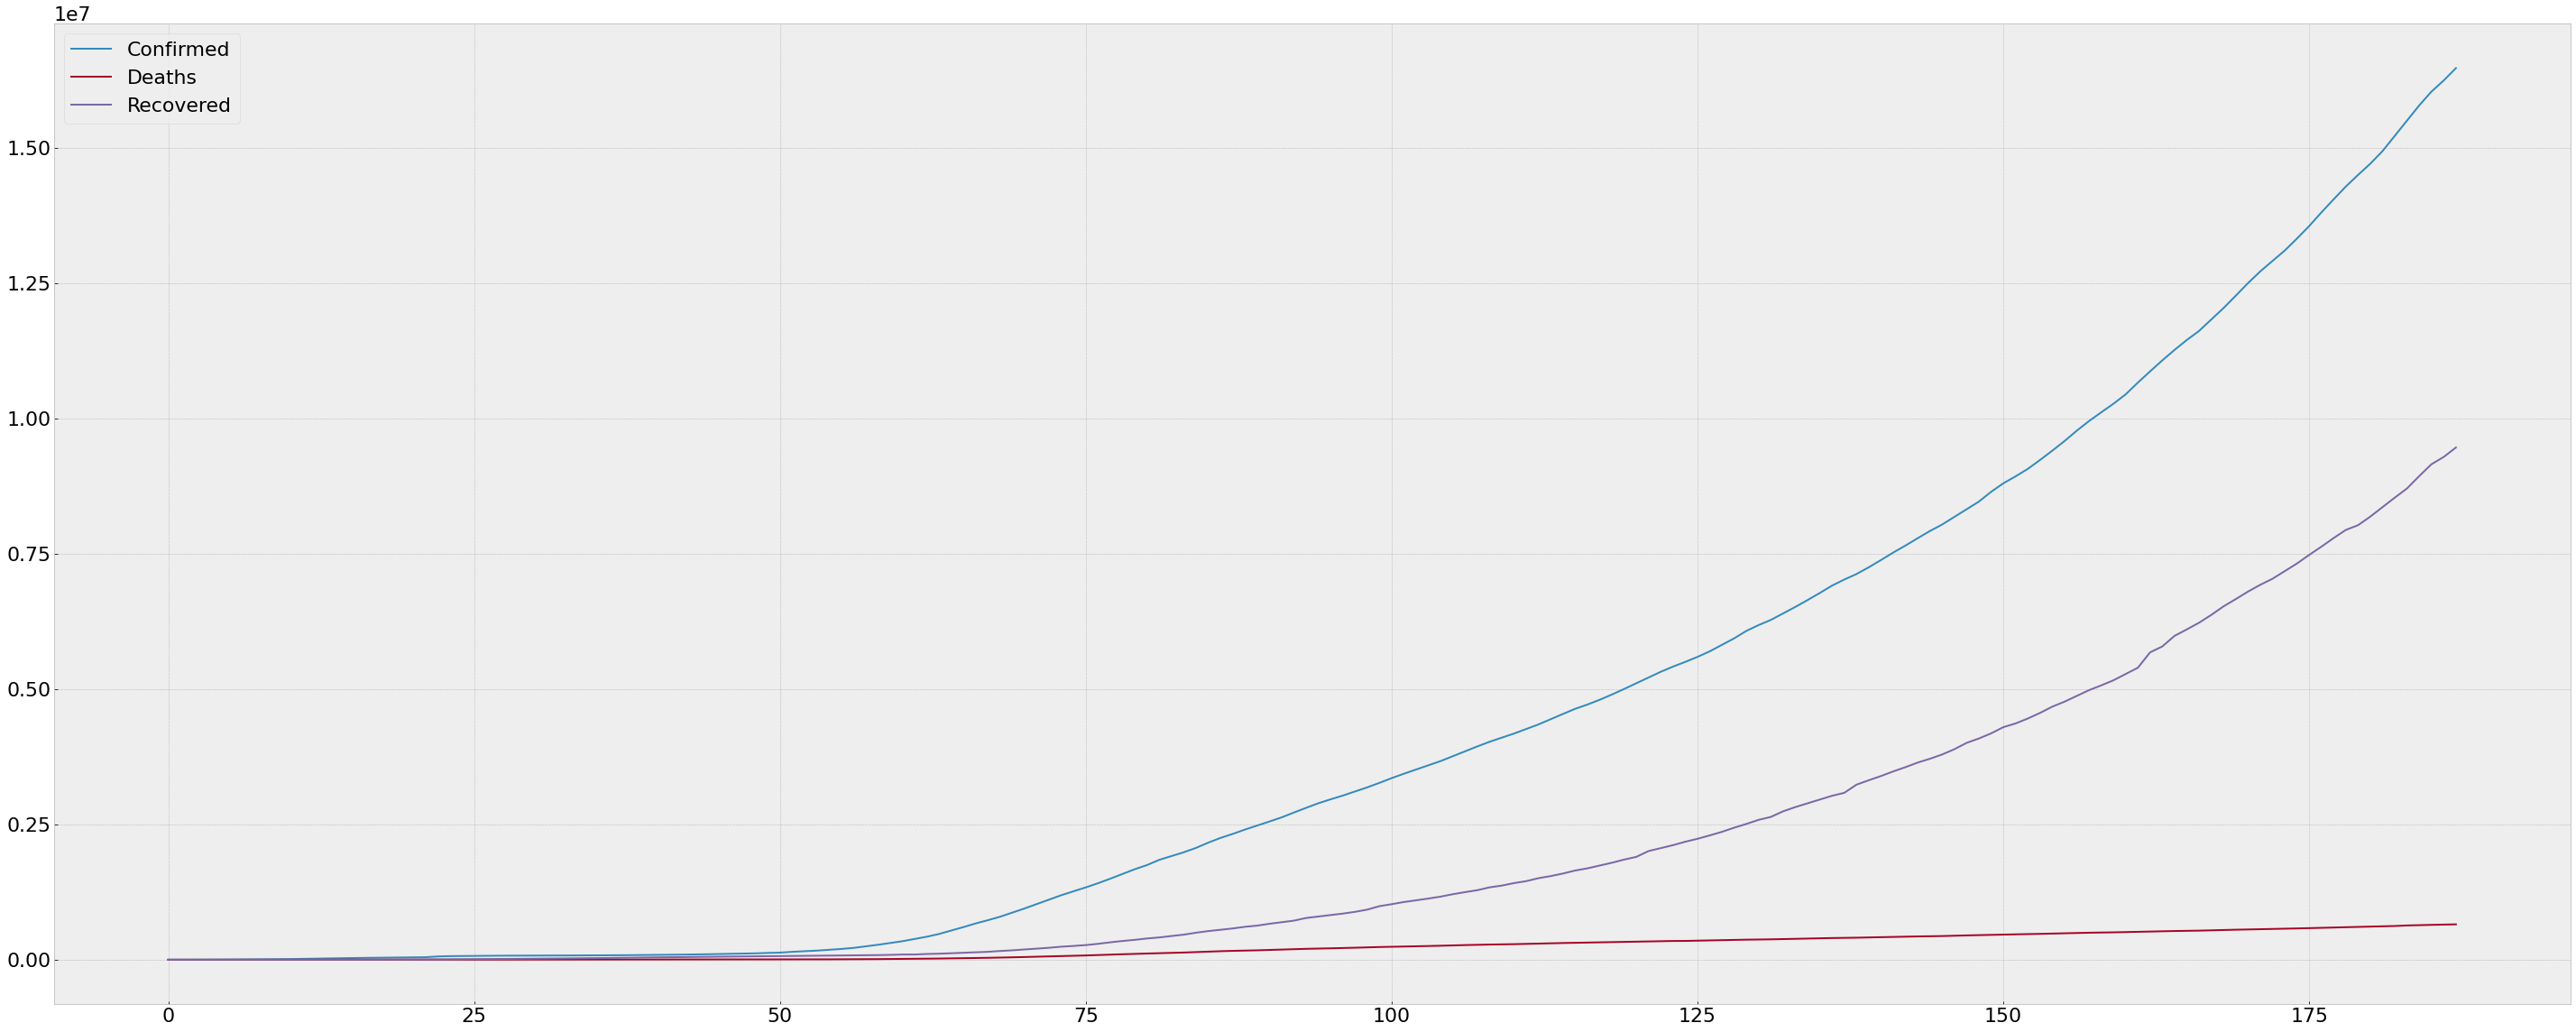

In [25]:
#Using a visualization plot to compare if the days increase what happen( recovered, deaths ,Confirmed)
x= list(group_by_date.index) 
plt.plot(x, group_by_date['Confirmed'])
plt.plot(x, group_by_date['Deaths'] )
plt.plot(x,group_by_date['Recovered'])
plt.legend(['Confirmed','Deaths','Recovered'],loc="upper left")

<BarContainer object of 20 artists>

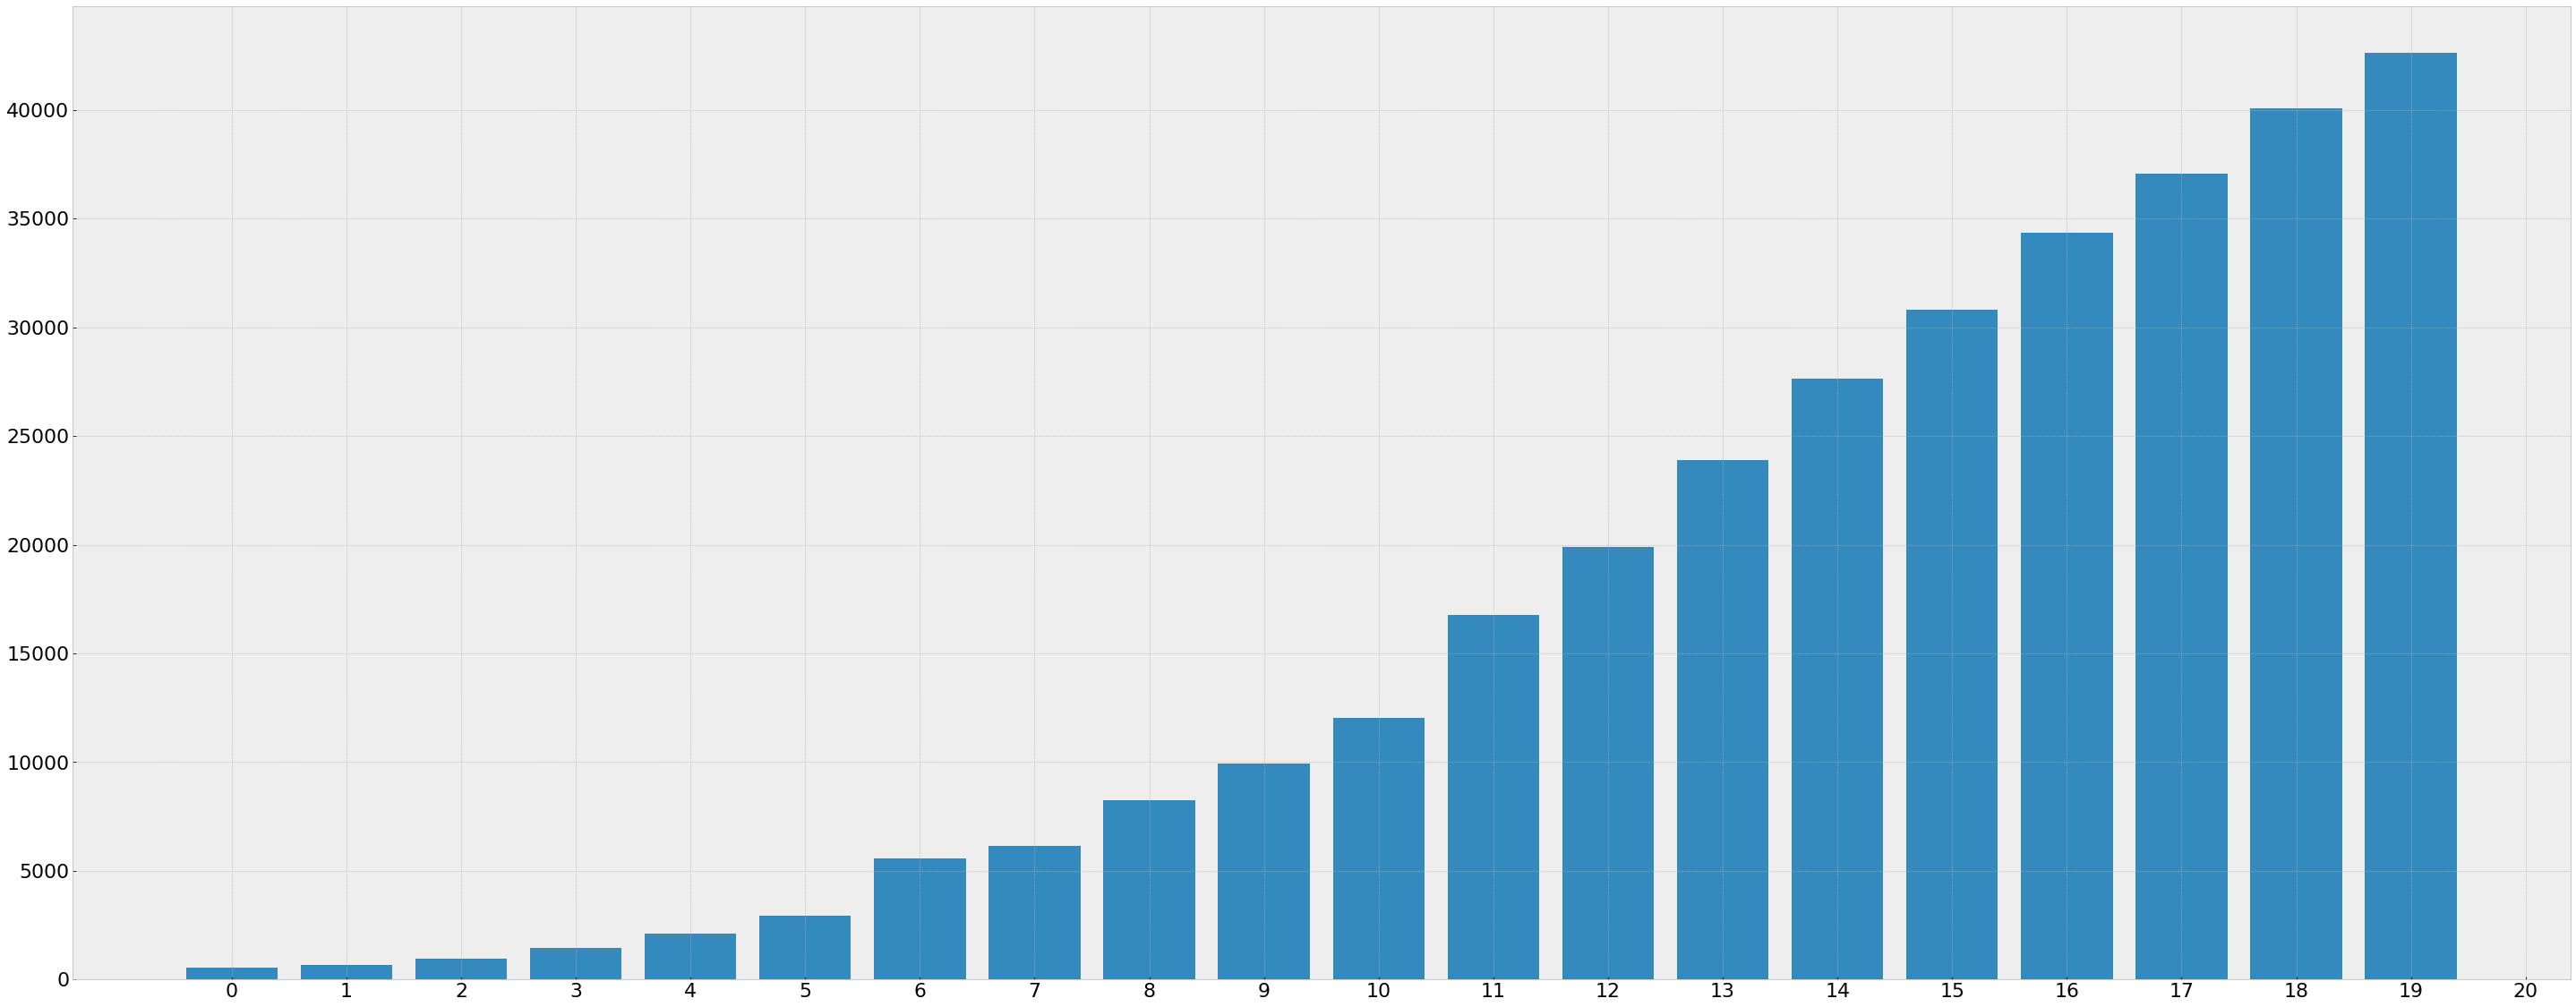

In [26]:
##Using a visualization plot bar to compare if the days increase what happen( recovered, deaths ,Confirmed)
x=list(range(len(group_by_date.index)))
plt.xticks (x, group_by_date. index)
plt.bar(x[:20], group_by_date["Confirmed" ][:20])

<AxesSubplot:ylabel='WHO Region'>

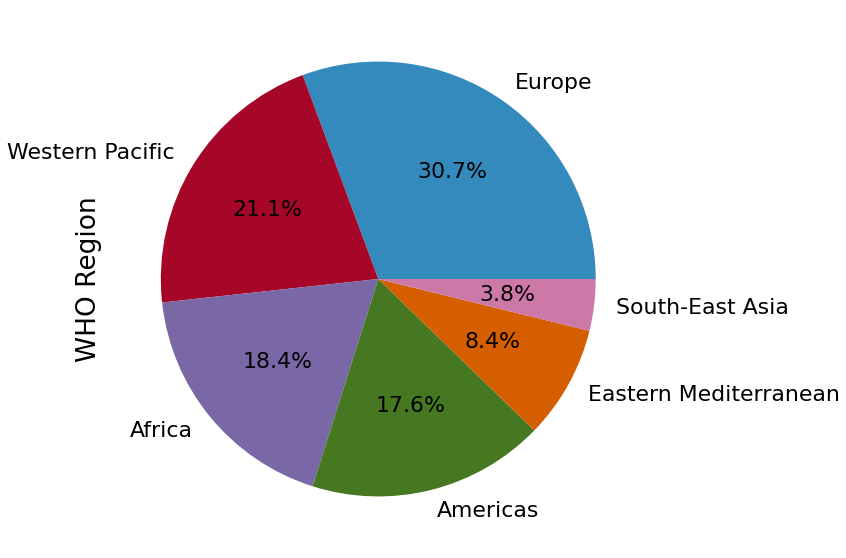

In [27]:
#Representation of WHO Region in A pie plot to compare between each district
#and the other and to know the proportion of covid19 in the lowest region
plt.figure(figsize=(20,10))
df['WHO Region'].value_counts().plot.pie(autopct="%1.1f%%")

In [28]:
# data visualization by manth

In [29]:
#Group by for data using manth by max vule columns
df. index = pd. to_datetime(df["Date"])
group_by_manth=df.groupby(pd.Grouper(freq="M")).agg({'Confirmed': 'max','Recovered':'max', 'Deaths':'max'}).reset_index()

In [30]:
group_by_manth

Date  Confirmed  Recovered  Deaths
0 2020-01-31       5806        141     204
1 2020-02-29      66337      28993    2727
2 2020-03-31     188724      63153   12428
3 2020-04-30    1072667     153947   64256
4 2020-05-31    1799124     444758  105364
5 2020-06-30    2636414     788318  127432
6 2020-07-31    4290259    1846641  148011

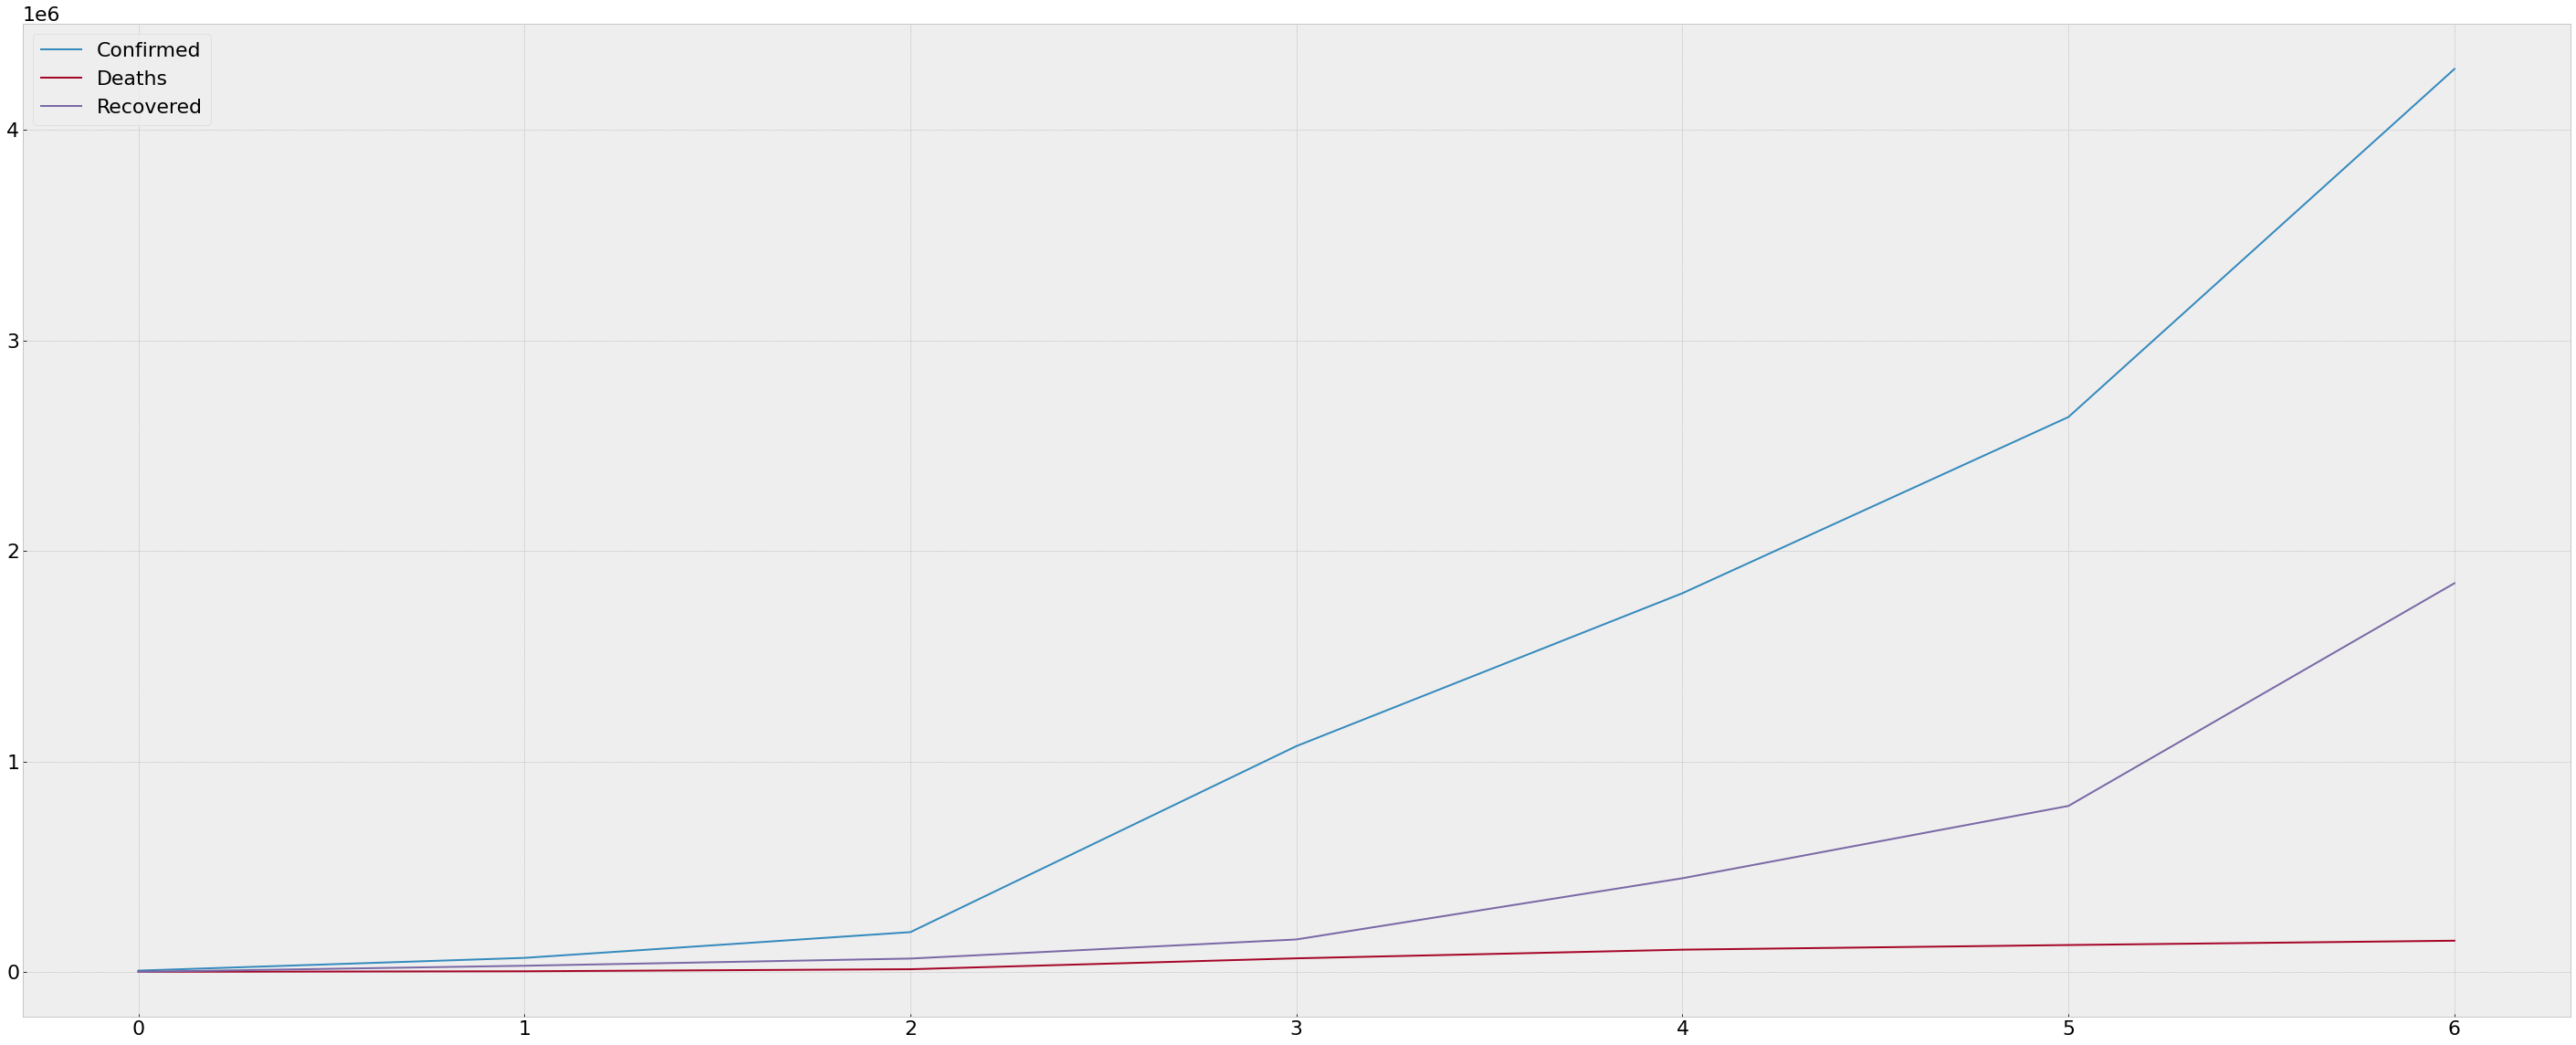

In [31]:
###Using a visualization plot to compare if the manth increase what happen( recovered, deaths ,Confirmed)
x= list(group_by_manth.index) 
plt.plot(x, group_by_manth['Confirmed'])
plt.plot(x,group_by_manth['Deaths'] )
plt.plot(x,group_by_manth['Recovered'])
plt.legend(['Confirmed','Deaths','Recovered'],loc="upper left")

In [32]:
# data visualization by countries

In [33]:
#Group by for data using countries by max vule columns
group_by_countries=df[df["Date"]==max(df["Date"])]

In [34]:
group_by_countries.head()

Province/State Country/Region       Lat       Long       Date  \
Date                                                                       
2020-07-27              0    Afghanistan  33.93911  67.709953 2020-07-27   
2020-07-27              0        Albania  41.15330  20.168300 2020-07-27   
2020-07-27              0        Algeria  28.03390   1.659600 2020-07-27   
2020-07-27              0        Andorra  42.50630   1.521800 2020-07-27   
2020-07-27              0         Angola -11.20270  17.873900 2020-07-27   

            Confirmed  Deaths  Recovered  Active             WHO Region  
Date                                                                     
2020-07-27      36263    1269      25198    9796  Eastern Mediterranean  
2020-07-27       4880     144       2745    1991                 Europe  
2020-07-27      27973    1163      18837    7973                 Africa  
2020-07-27        907      52        803      52                 Europe  
2020-07-27        950      41        242     667                 Africa

In [35]:
#Group by for data using countries by max vule columns and using there columns(Confirmed,Recovered,Deaths)
group_by_countries=group_by_countries.groupby("Country/Region").agg({'Confirmed': 'sum','Recovered':'sum', 'Deaths':'sum'})

In [36]:
group_by_countries

Confirmed  Recovered  Deaths
Country/Region                                  
Afghanistan             36263      25198    1269
Albania                  4880       2745     144
Algeria                 27973      18837    1163
Andorra                   907        803      52
Angola                    950        242      41
...                       ...        ...     ...
West Bank and Gaza      10621       3752      78
Western Sahara             10          8       1
Yemen                    1691        833     483
Zambia                   4552       2815     140
Zimbabwe                 2704        542      36

[187 rows x 3 columns]

In [37]:
#using sort data
group_by_countries=group_by_countries.sort_values(by="Confirmed" ,ascending=False)

In [38]:
group_by_countries.index

Index(['US', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico', 'Peru',
       'Chile', 'United Kingdom', 'Iran',
       ...
       'Fiji', 'Saint Lucia', 'Timor-Leste', 'Grenada', 'Laos', 'Dominica',
       'Saint Kitts and Nevis', 'Greenland', 'Holy See', 'Western Sahara'],
      dtype='object', name='Country/Region', length=187)

<BarContainer object of 10 artists>

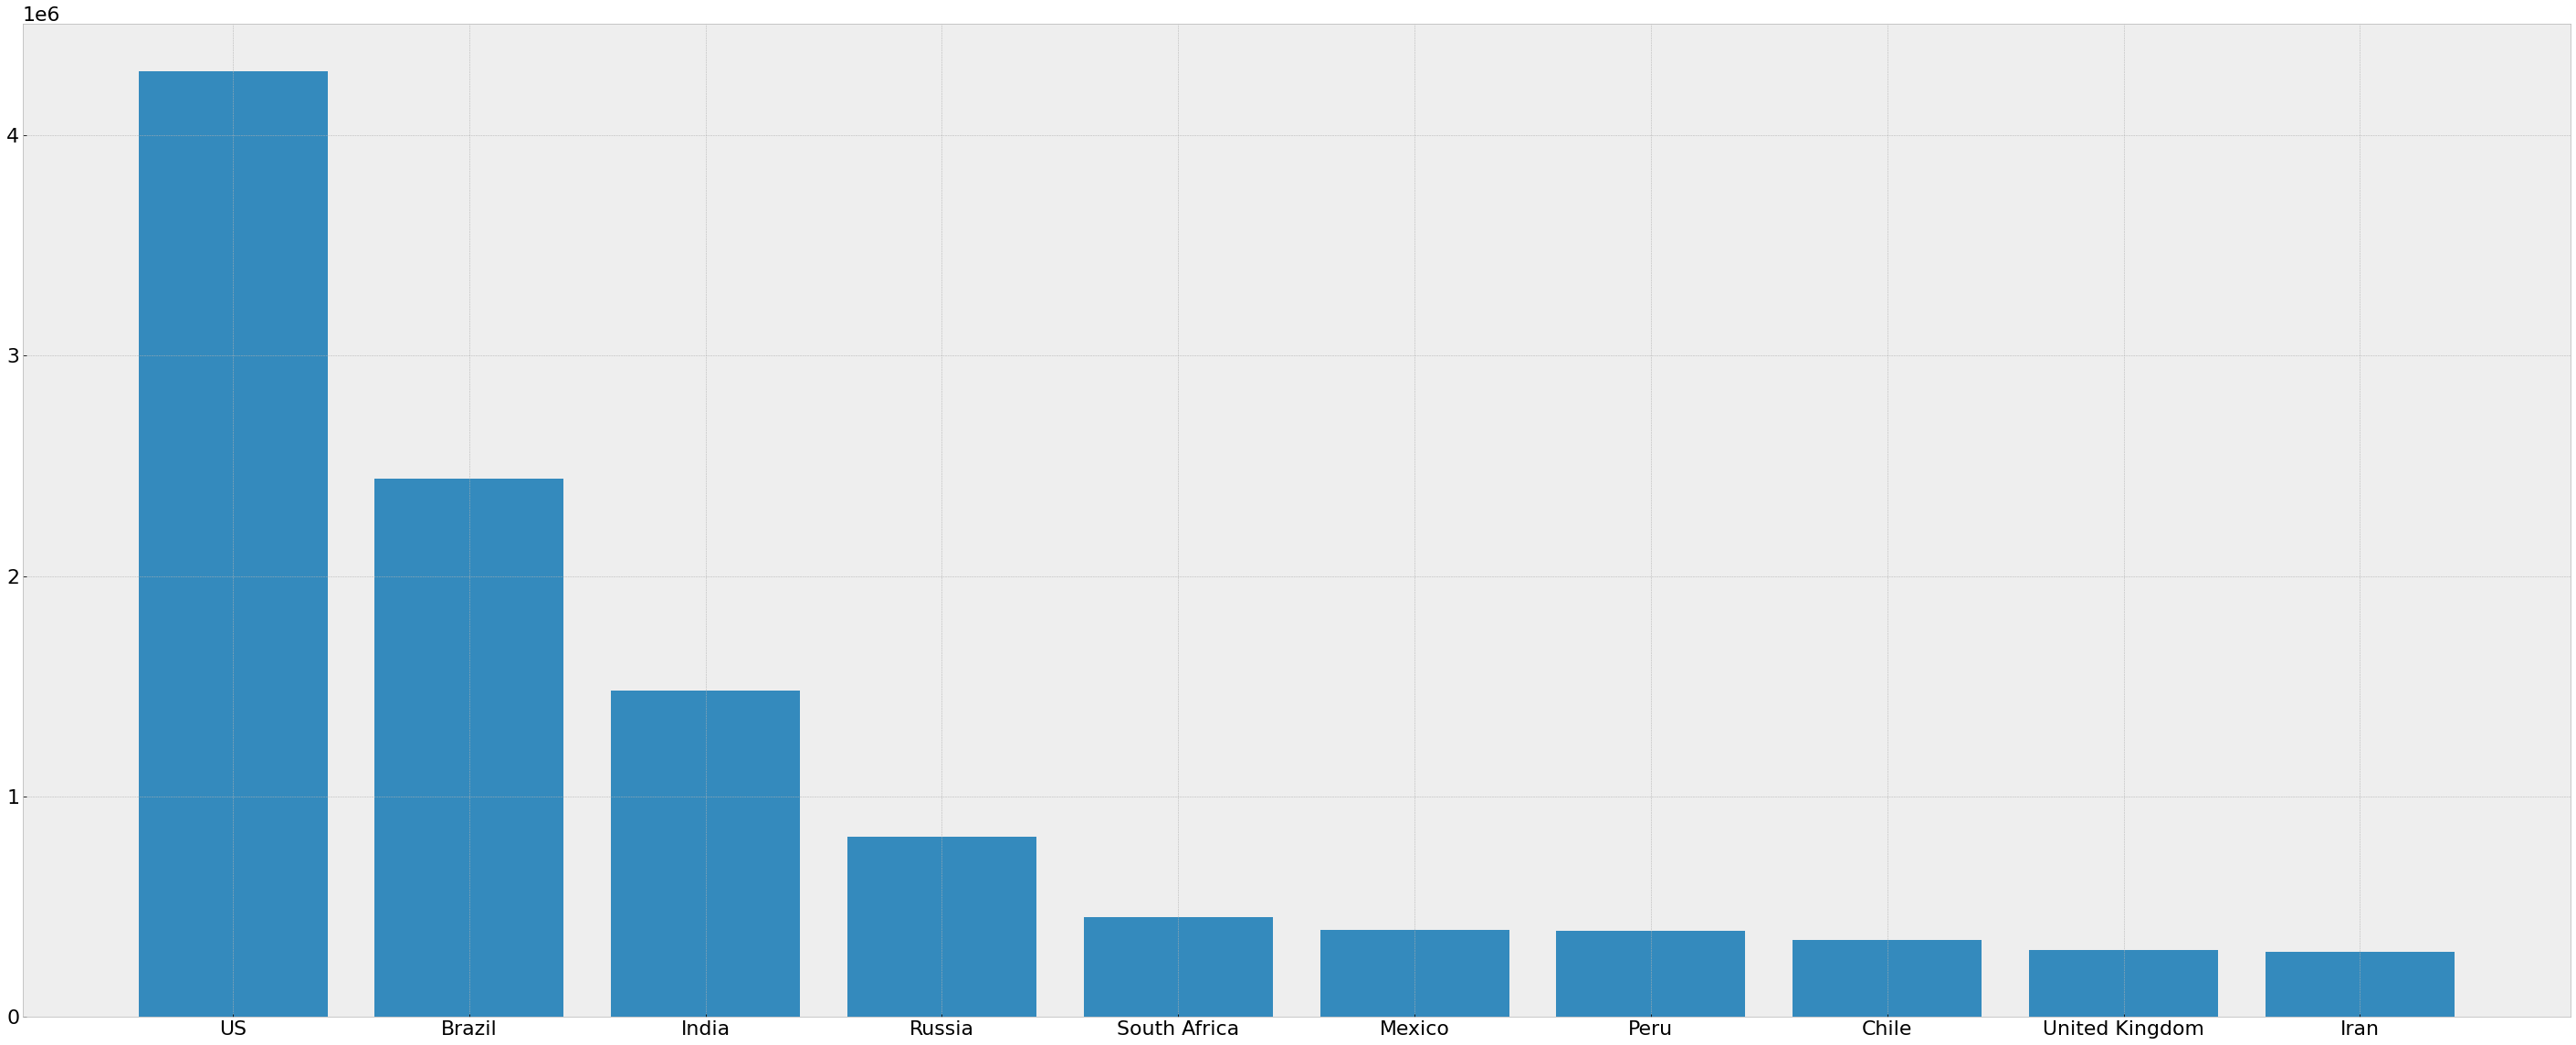

In [39]:
#Using a visualization plot bar to compare Between countries on the number of confirmed 
x=list(range(len(group_by_countries.index)))
plt.xticks (x, group_by_countries. index)
plt.bar(x[:10], group_by_countries["Confirmed" ][:10])

In [40]:
group_by_countries

Confirmed  Recovered  Deaths
Country/Region                                     
US                       4290259    1325804  148011
Brazil                   2442375    1846641   87618
India                    1480073     951166   33408
Russia                    816680     602249   13334
South Africa              452529     274925    7067
...                          ...        ...     ...
Dominica                      18         18       0
Saint Kitts and Nevis         17         15       0
Greenland                     14         13       0
Holy See                      12         12       0
Western Sahara                10          8       1

[187 rows x 3 columns]

In [41]:
group_by_countries

Confirmed  Recovered  Deaths
Country/Region                                     
US                       4290259    1325804  148011
Brazil                   2442375    1846641   87618
India                    1480073     951166   33408
Russia                    816680     602249   13334
South Africa              452529     274925    7067
...                          ...        ...     ...
Dominica                      18         18       0
Saint Kitts and Nevis         17         15       0
Greenland                     14         13       0
Holy See                      12         12       0
Western Sahara                10          8       1

[187 rows x 3 columns]

In [42]:
#Calculate the percentage of Death
group_by_countries["Death_per"] =group_by_countries["Deaths"] / group_by_countries["Confirmed"]

In [43]:
#Calculate the percentage of Recovered
group_by_countries["Recovered _per"] =group_by_countries["Recovered"] / group_by_countries["Confirmed"]

In [44]:
#Calculate the percentage of Confirmed
group_by_countries["Confirmed_per"] =group_by_countries["Confirmed"] - group_by_countries["Deaths"]-group_by_countries["Recovered"]

In [45]:
group_by_countries_pie_chart=group_by_countries.reset_index()

In [46]:
group_by_countries_pie_chart

Country/Region  Confirmed  Recovered  Deaths  Death_per  \
0                       US    4290259    1325804  148011   0.034499   
1                   Brazil    2442375    1846641   87618   0.035874   
2                    India    1480073     951166   33408   0.022572   
3                   Russia     816680     602249   13334   0.016327   
4             South Africa     452529     274925    7067   0.015617   
..                     ...        ...        ...     ...        ...   
182               Dominica         18         18       0   0.000000   
183  Saint Kitts and Nevis         17         15       0   0.000000   
184              Greenland         14         13       0   0.000000   
185               Holy See         12         12       0   0.000000   
186         Western Sahara         10          8       1   0.100000   

     Recovered _per  Confirmed_per  
0          0.309027        2816444  
1          0.756084         508116  
2          0.642648         495499  
3          0.737436         201097  
4          0.607530         170537  
..              ...            ...  
182        1.000000              0  
183        0.882353              2  
184        0.928571              1  
185        1.000000              0  
186        0.800000              1  

[187 rows x 7 columns]

In [47]:
!pip install plotly

In [48]:
import plotly.express as px

In [49]:
#Clarify the number of (Confirmed) and (deaths) for each country
df =group_by_countries_pie_chart
fig = px.line(df, x='Country/Region', y='Confirmed')
fig.add_scatter(x=df['Country/Region'], y=df['Deaths'], mode='lines')
fig.show()

In [50]:
#Clarify the number of (Confirmed) and (Recovered) for each country
fig = px.line(df, x='Country/Region', y='Confirmed')
fig.add_scatter(x=df['Country/Region'], y=df['Recovered'], mode='lines')
fig.show()


In [51]:
group_by_countries_pie_chart

Country/Region  Confirmed  Recovered  Deaths  Death_per  \
0                       US    4290259    1325804  148011   0.034499   
1                   Brazil    2442375    1846641   87618   0.035874   
2                    India    1480073     951166   33408   0.022572   
3                   Russia     816680     602249   13334   0.016327   
4             South Africa     452529     274925    7067   0.015617   
..                     ...        ...        ...     ...        ...   
182               Dominica         18         18       0   0.000000   
183  Saint Kitts and Nevis         17         15       0   0.000000   
184              Greenland         14         13       0   0.000000   
185               Holy See         12         12       0   0.000000   
186         Western Sahara         10          8       1   0.100000   

     Recovered _per  Confirmed_per  
0          0.309027        2816444  
1          0.756084         508116  
2          0.642648         495499  
3          0.737436         201097  
4          0.607530         170537  
..              ...            ...  
182        1.000000              0  
183        0.882353              2  
184        0.928571              1  
185        1.000000              0  
186        0.800000              1  

[187 rows x 7 columns]

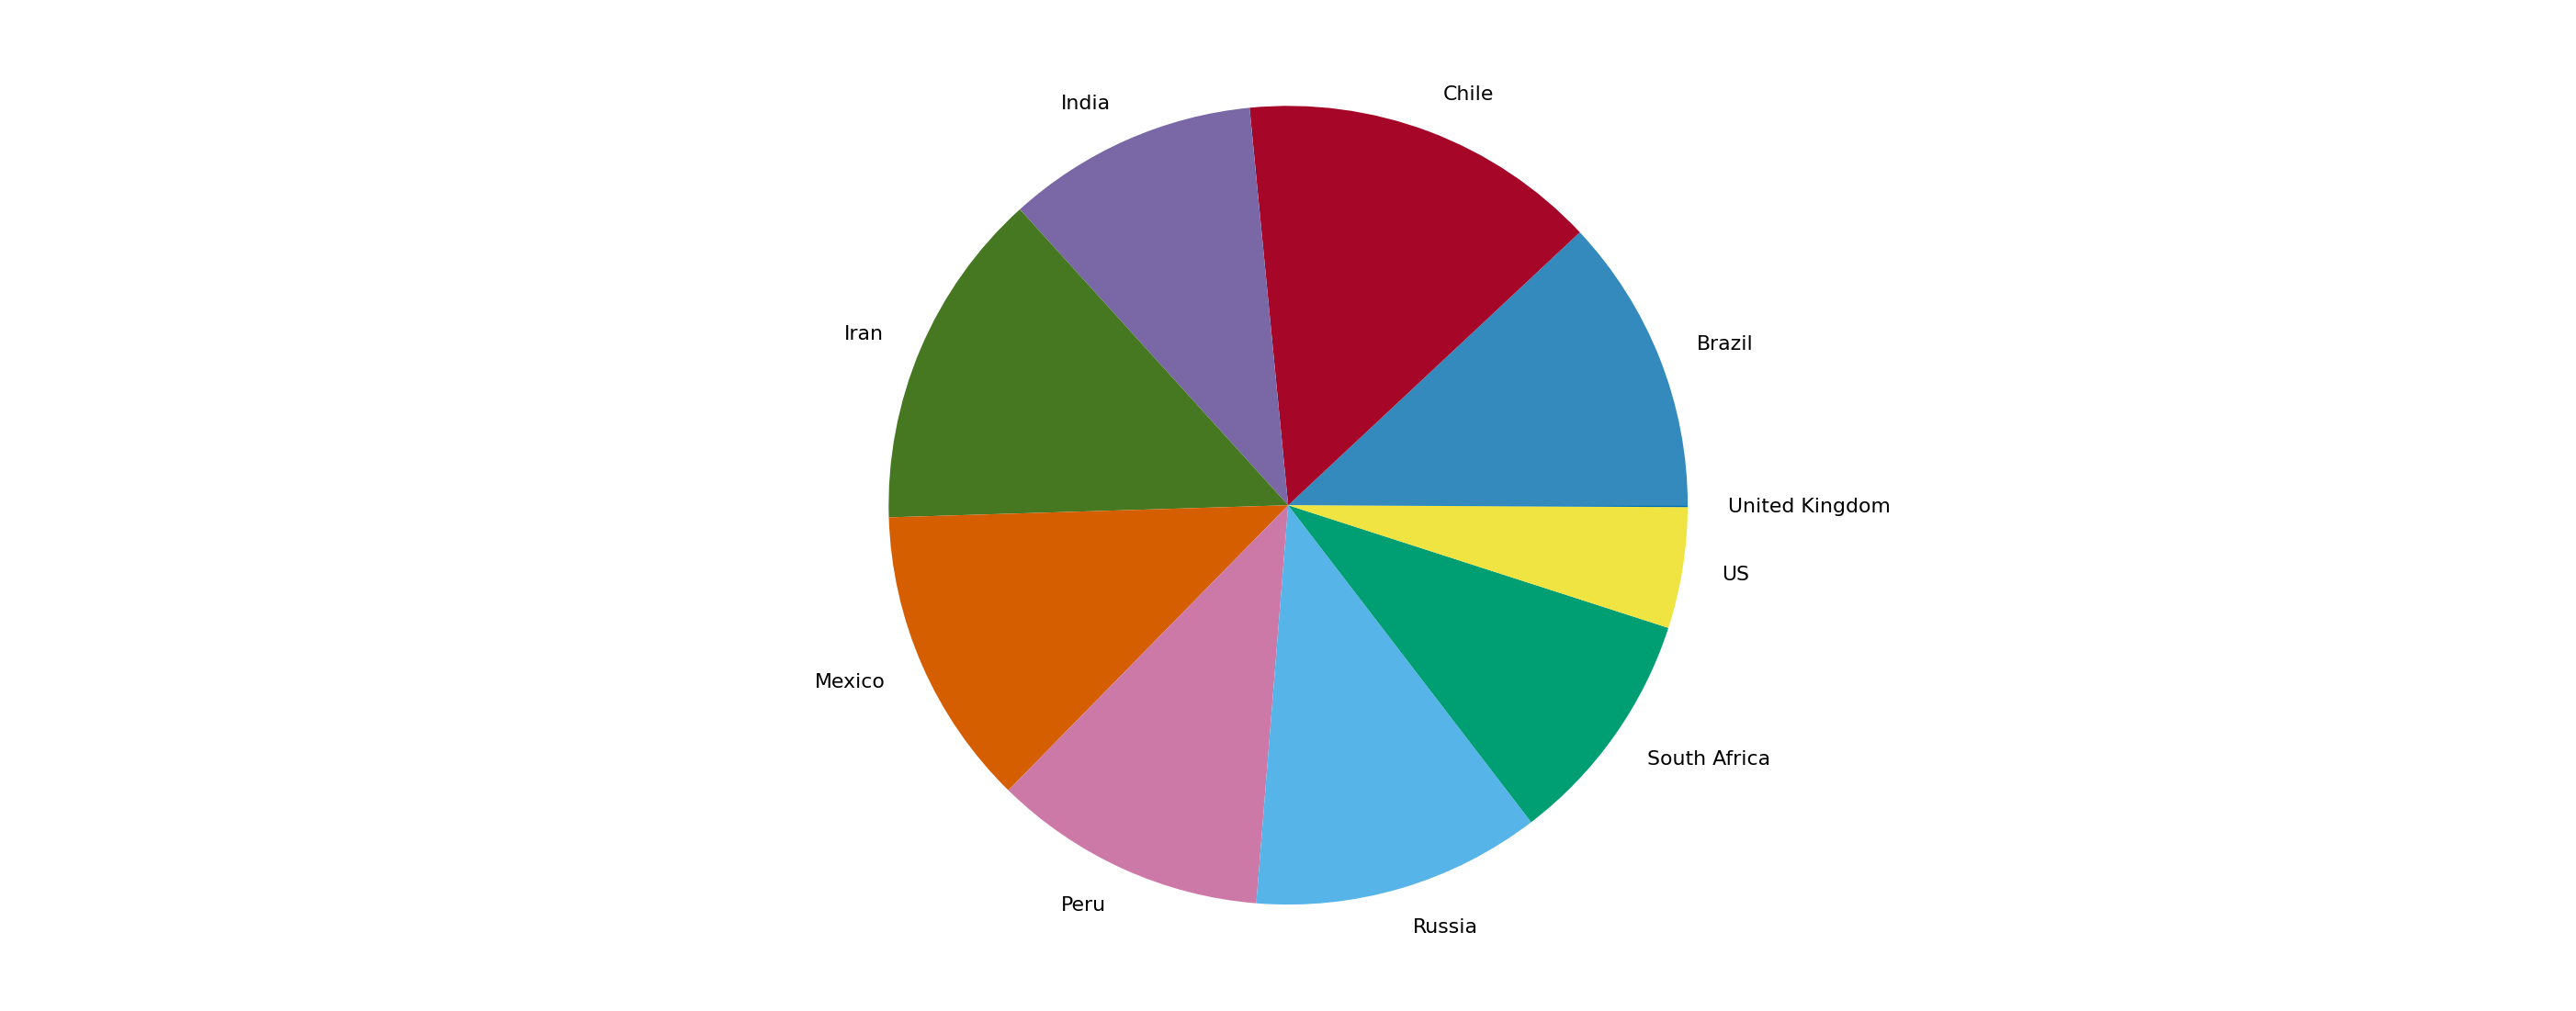

In [52]:
#Representation of Country/Region in A pie plot to compare between each countrie
#and the other and to know Percentage of recovering  in the each countrie
sums = group_by_countries_pie_chart.groupby(group_by_countries_pie_chart['Country/Region'][:10])["Recovered _per"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

<ipython-input-53-737e32ea5e0d>:5: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



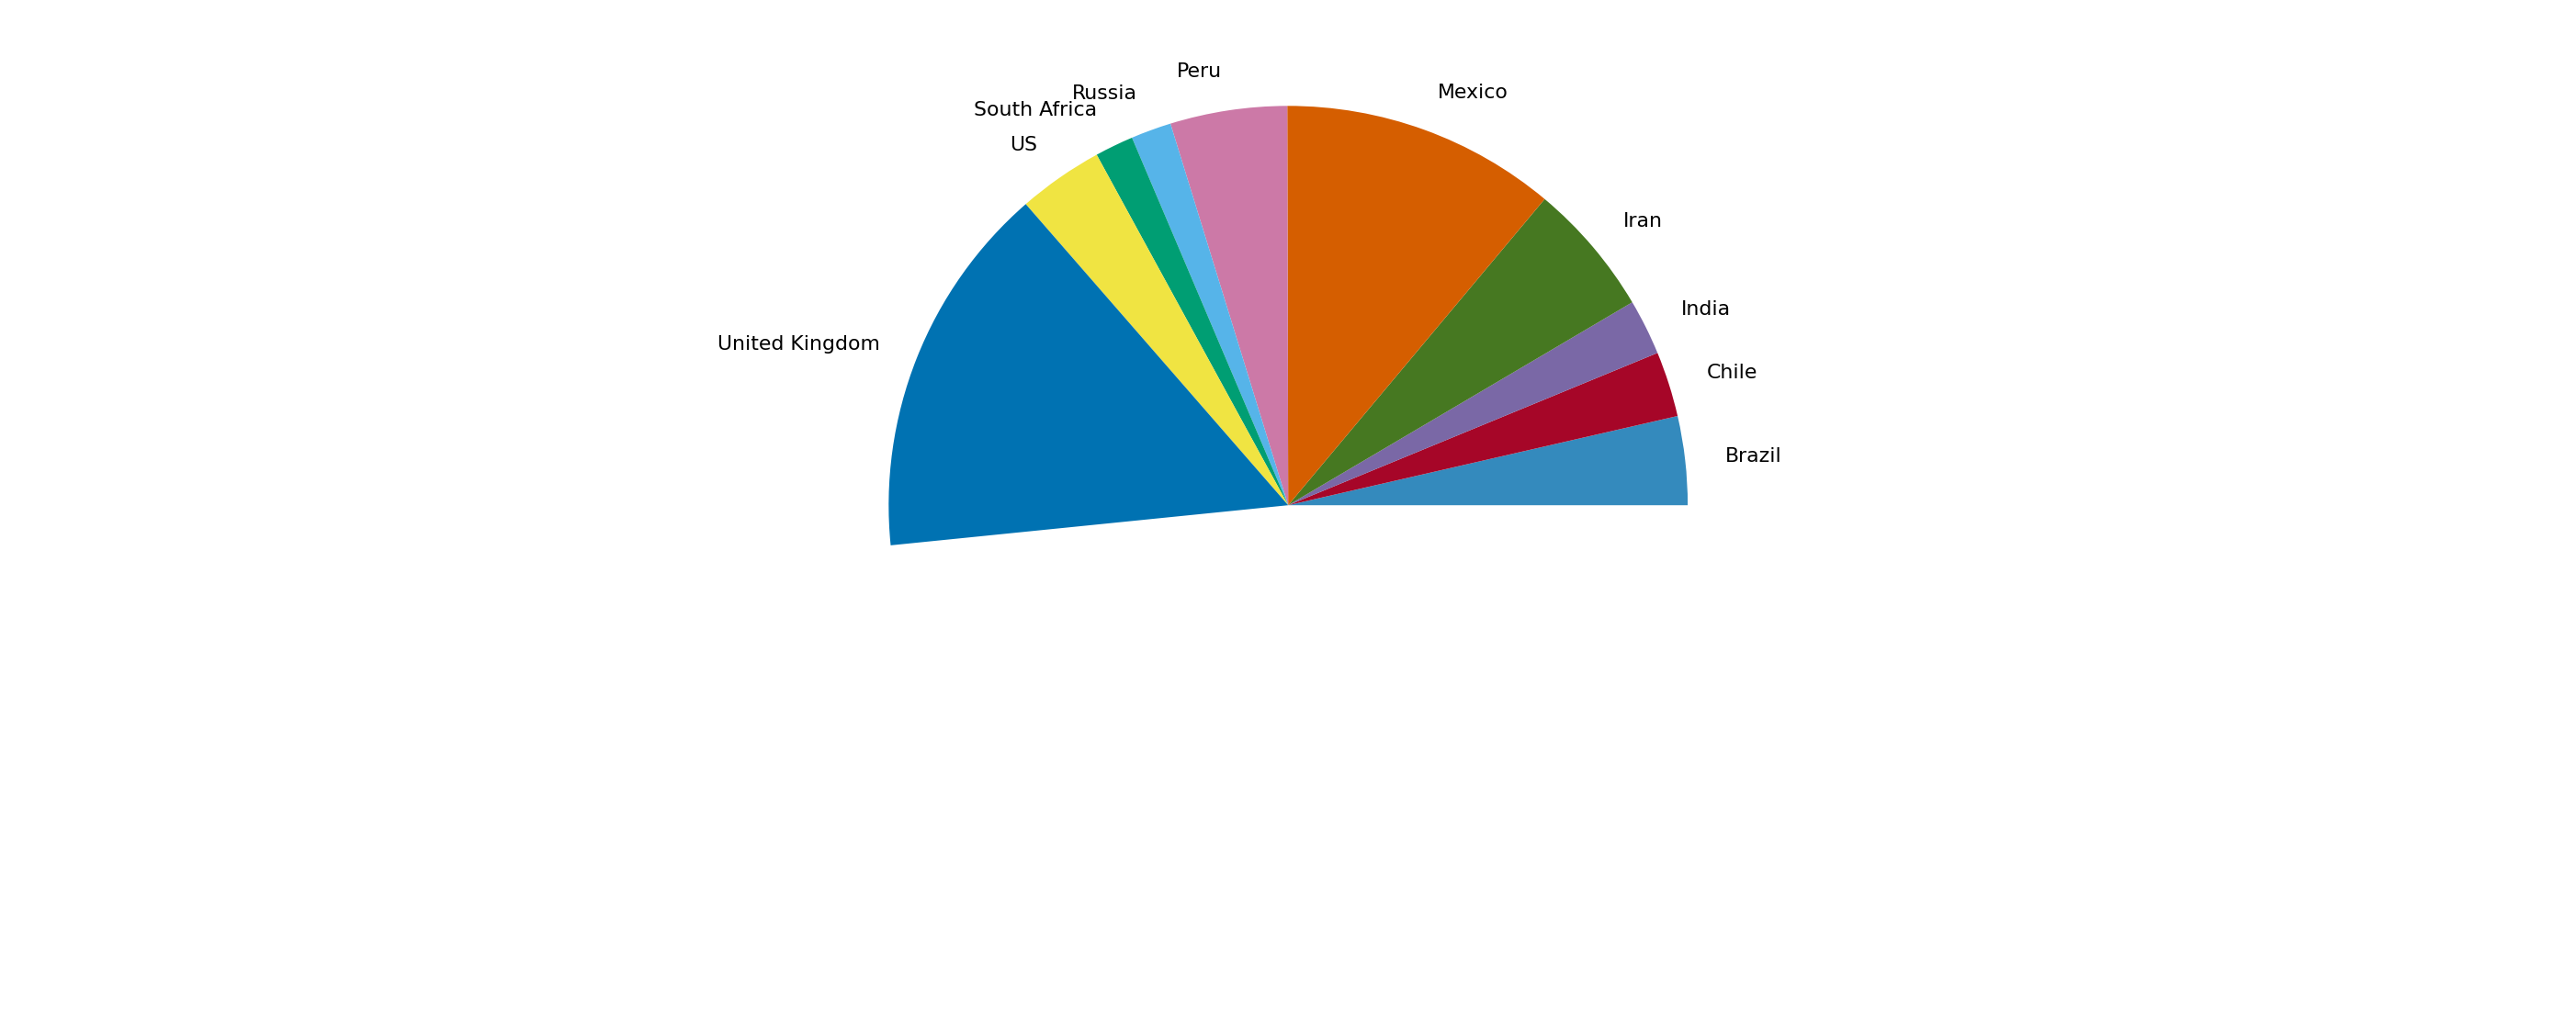

In [53]:
#Representation of Country/Region in A pie plot to compare between each countrie
#and the other and to know Percentage of Death  in the each countrie
sums = group_by_countries_pie_chart.groupby(group_by_countries_pie_chart['Country/Region'][:10])["Death_per"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [54]:
group_by_countries_pie_chart

Country/Region  Confirmed  Recovered  Deaths  Death_per  \
0                       US    4290259    1325804  148011   0.034499   
1                   Brazil    2442375    1846641   87618   0.035874   
2                    India    1480073     951166   33408   0.022572   
3                   Russia     816680     602249   13334   0.016327   
4             South Africa     452529     274925    7067   0.015617   
..                     ...        ...        ...     ...        ...   
182               Dominica         18         18       0   0.000000   
183  Saint Kitts and Nevis         17         15       0   0.000000   
184              Greenland         14         13       0   0.000000   
185               Holy See         12         12       0   0.000000   
186         Western Sahara         10          8       1   0.100000   

     Recovered _per  Confirmed_per  
0          0.309027        2816444  
1          0.756084         508116  
2          0.642648         495499  
3          0.737436         201097  
4          0.607530         170537  
..              ...            ...  
182        1.000000              0  
183        0.882353              2  
184        0.928571              1  
185        1.000000              0  
186        0.800000              1  

[187 rows x 7 columns]

Text(0.5, 1.0, 'Covied19')

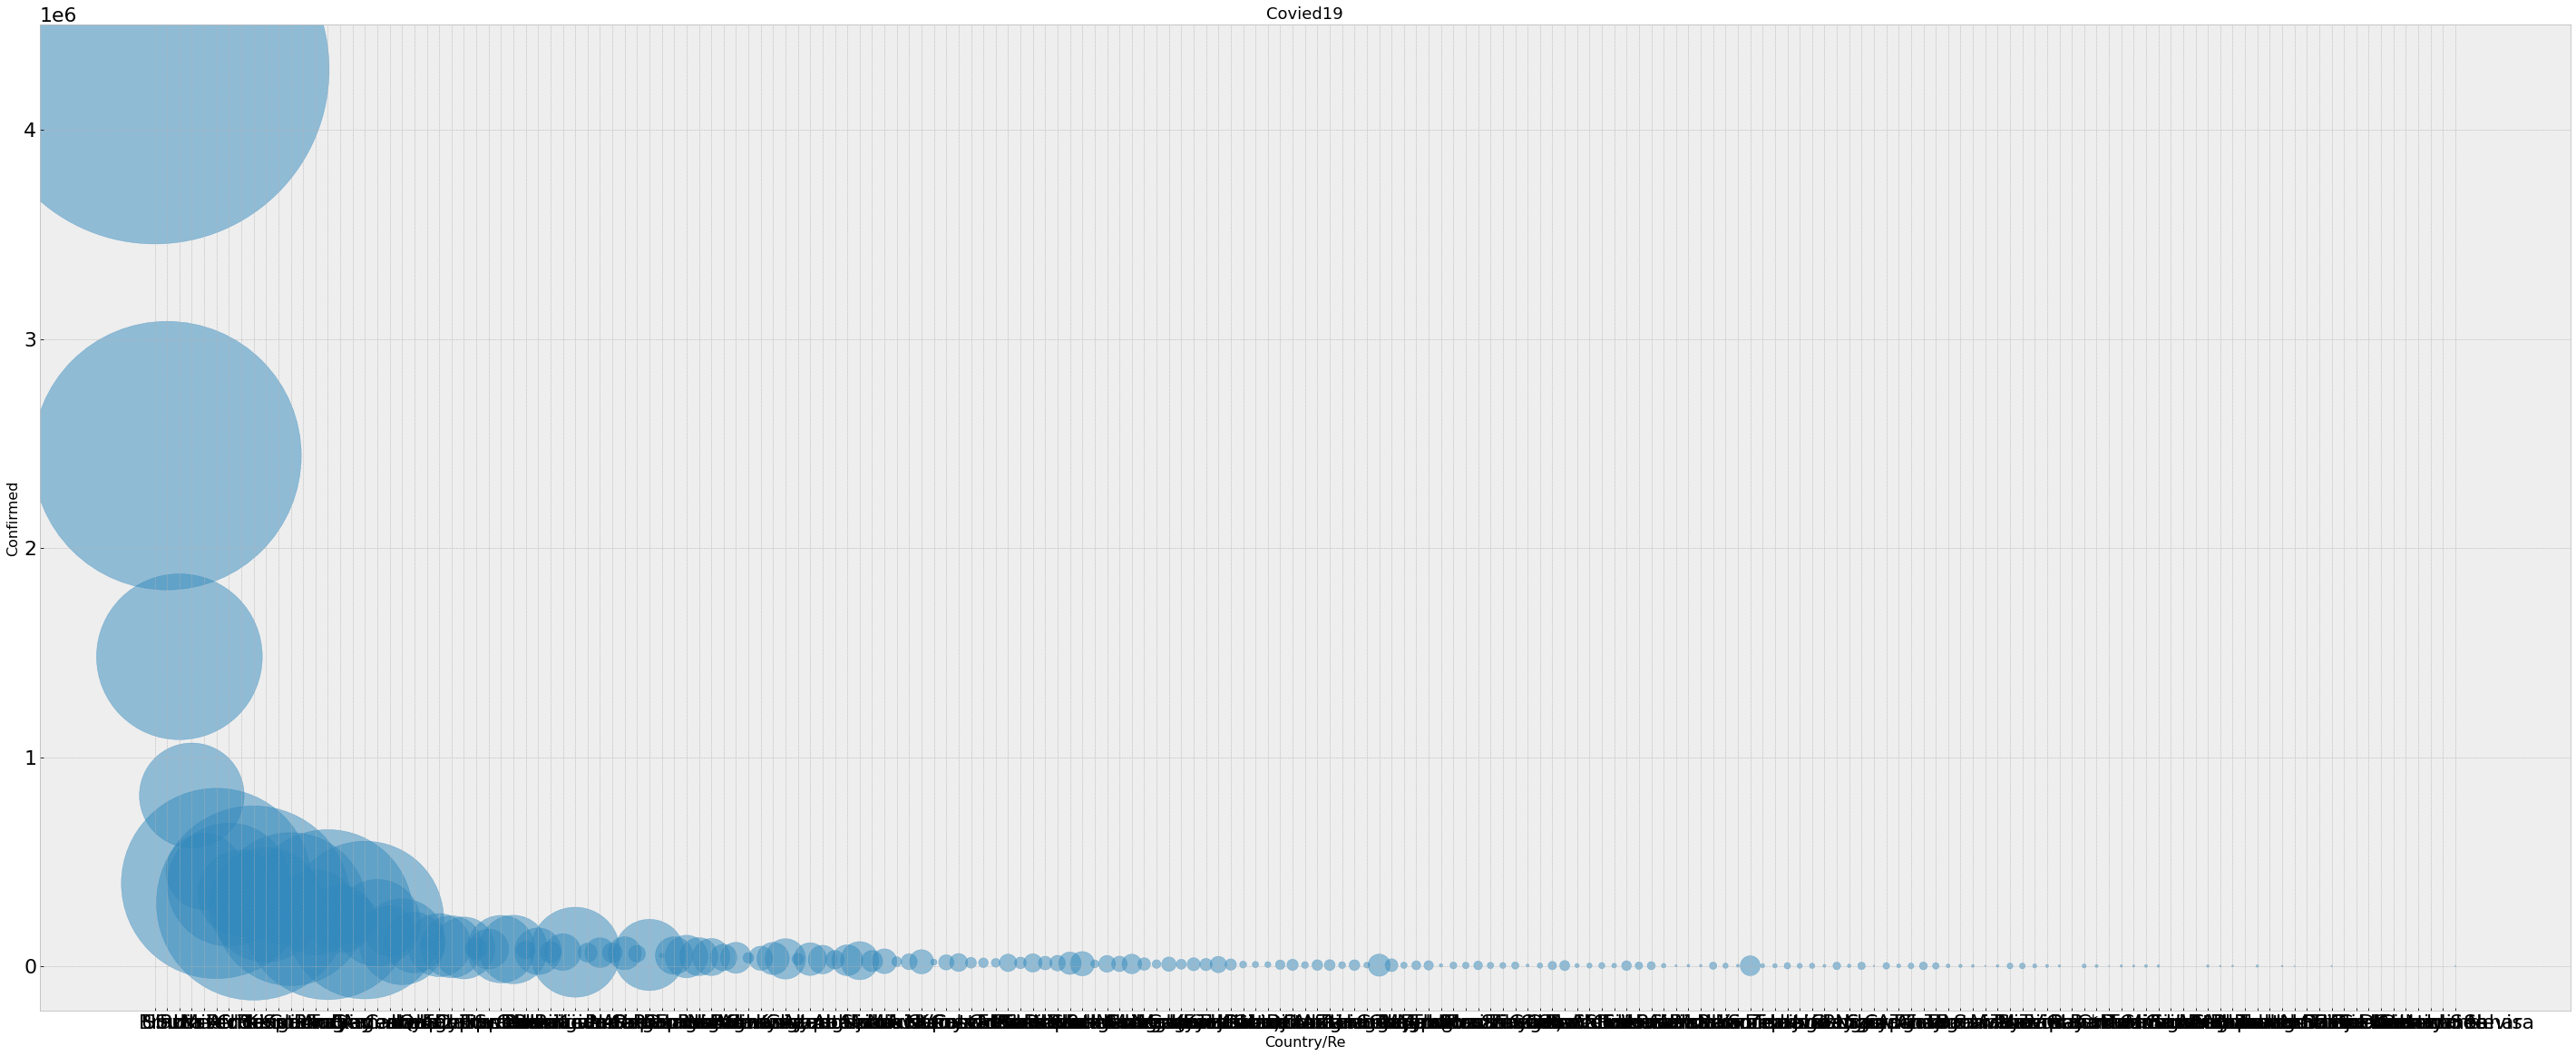

In [55]:
#Using the Bubble Plot to find out the deaths in each country in proportion to the confirmed number
plt.scatter('Country/Region', 'Confirmed', s='Deaths',alpha=0.5,data=group_by_countries_pie_chart)
plt.xlabel(("Country/Region"[:10]), size=16)
plt.ylabel(("Confirmed"[:10]), size=16)
plt.title("Covied19", size=18)

Text(0.5, 1.0, 'Bubble Plot with Matplotlib')

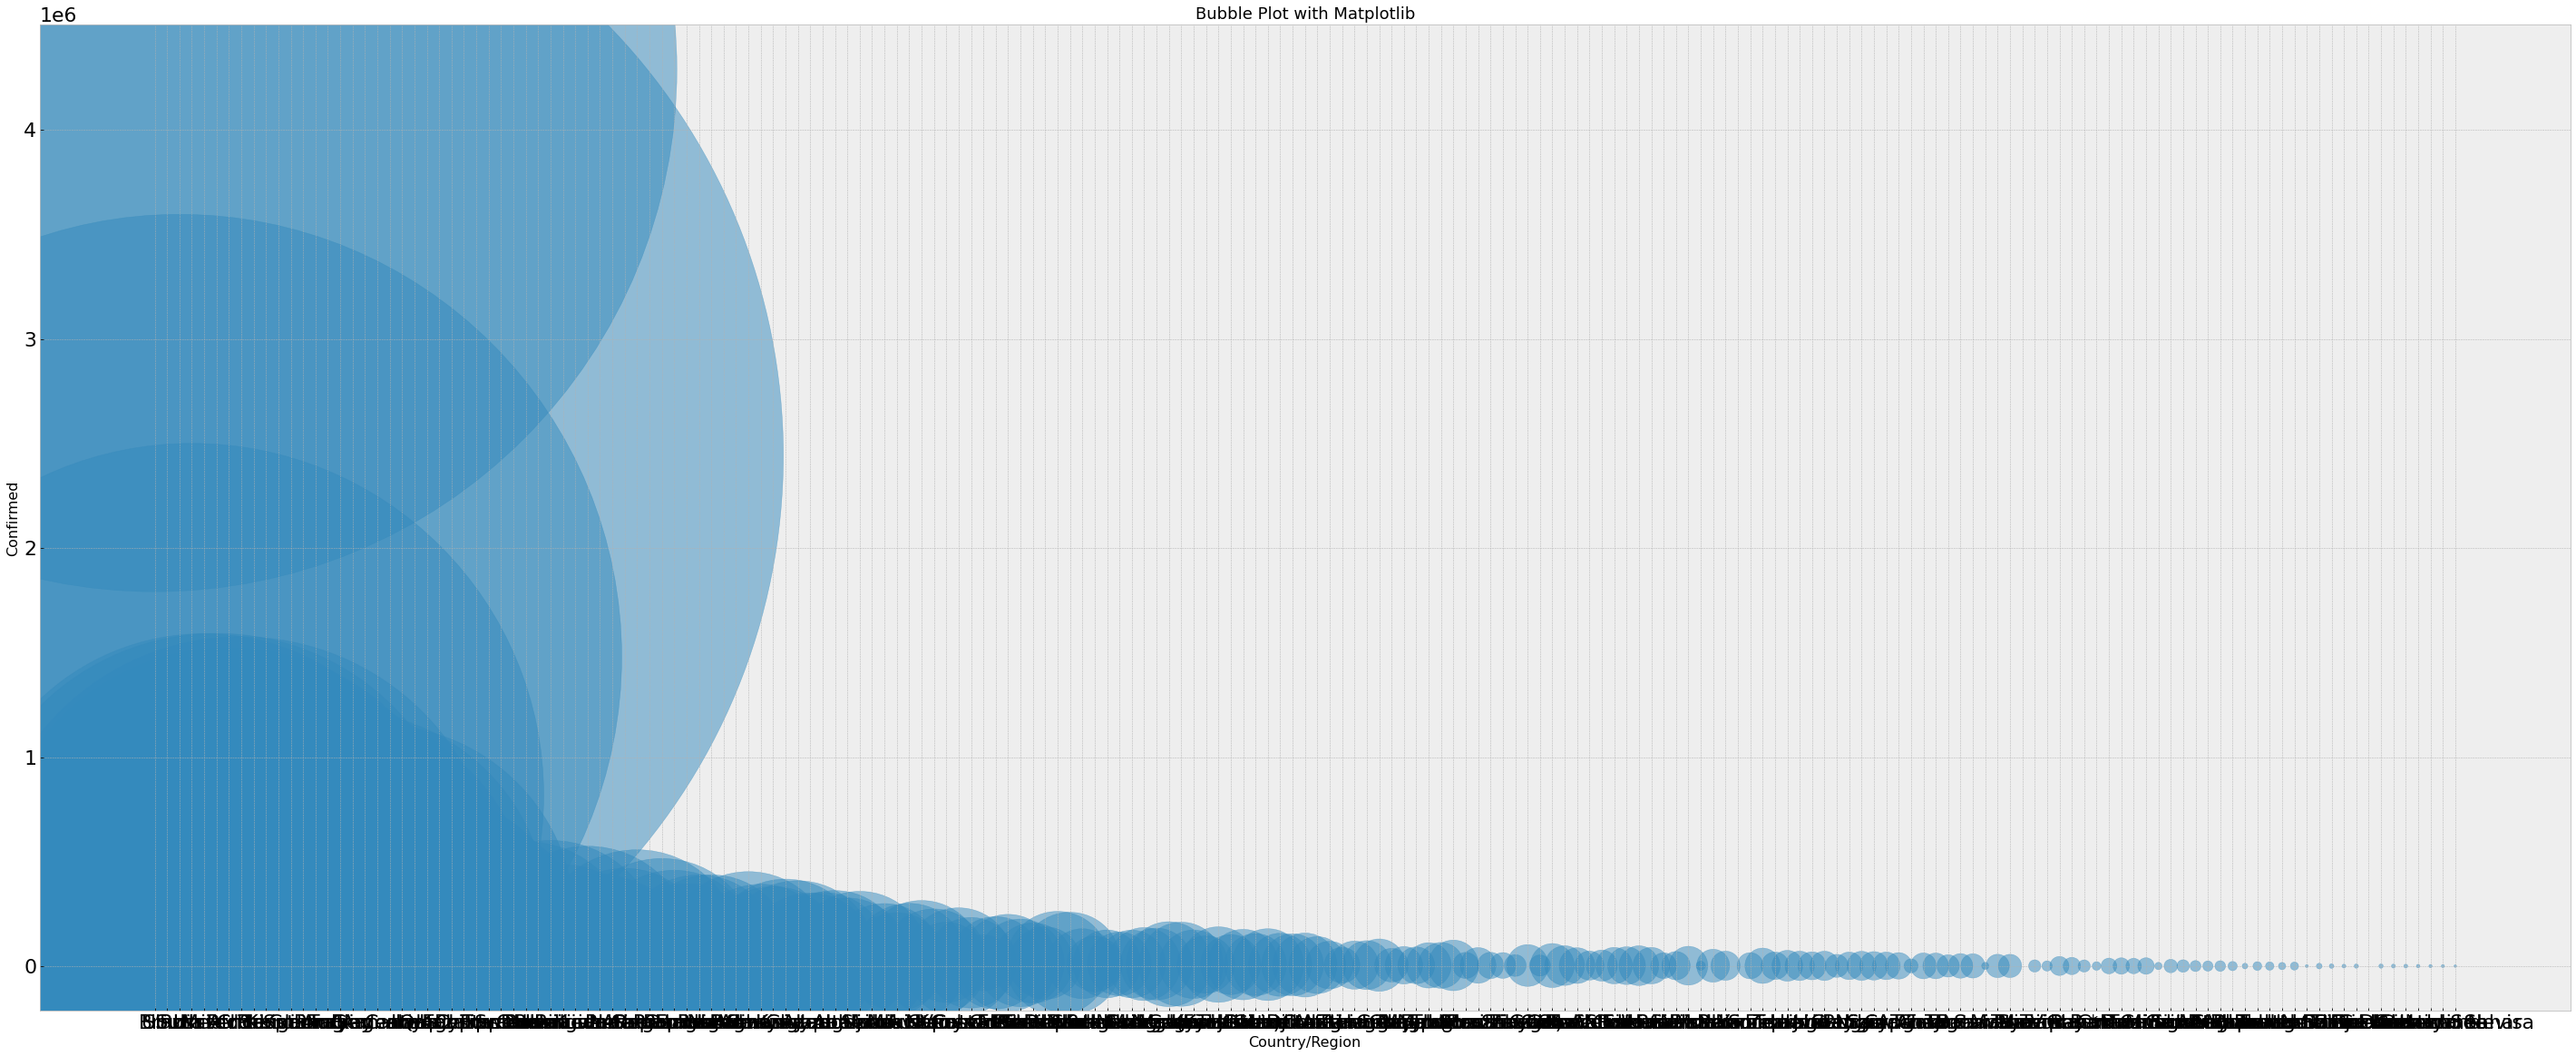

In [56]:
#Using the Bubble Plot to find out the Recovered in each country in proportion to the confirmed number
plt.scatter('Country/Region', 'Confirmed', s='Recovered',alpha=0.5,data=group_by_countries_pie_chart)
plt.xlabel(("Country/Region"), size=16)
plt.ylabel(("Confirmed"), size=16)
plt.title("Bubble Plot with Matplotlib", size=18)

In [57]:
# data visualization by countrie(Australia)

In [58]:
#Collect all the data it contain 'Australia'
Australia=dataset[dataset["Country/Region"] =='Australia']


In [59]:
Australia

Province/State Country/Region      Lat      Long  \
Date                                                                         
2020-01-22  Australian Capital Territory      Australia -35.4735  149.0124   
2020-01-22               New South Wales      Australia -33.8688  151.2093   
2020-01-22            Northern Territory      Australia -12.4634  130.8456   
2020-01-22                    Queensland      Australia -27.4698  153.0251   
2020-01-22               South Australia      Australia -34.9285  138.6007   
...                                  ...            ...      ...       ...   
2020-07-27                    Queensland      Australia -27.4698  153.0251   
2020-07-27               South Australia      Australia -34.9285  138.6007   
2020-07-27                      Tasmania      Australia -42.8821  147.3272   
2020-07-27                      Victoria      Australia -37.8136  144.9631   
2020-07-27             Western Australia      Australia -31.9505  115.8605   

                 Date  Confirmed  Deaths  Recovered  Active       WHO Region  
Date                                                                          
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
...               ...        ...     ...        ...     ...              ...  
2020-07-27 2020-07-27       1076       6       1063       7  Western Pacific  
2020-07-27 2020-07-27        447       4        441       2  Western Pacific  
2020-07-27 2020-07-27        229      13        215       1  Western Pacific  
2020-07-27 2020-07-27       9049      83       3817    5149  Western Pacific  
2020-07-27 2020-07-27        659       9        647       3  Western Pacific  

[1504 rows x 10 columns]

In [60]:
group_by_Australia=Australia[Australia["Date"]==max(Australia["Date"])]

In [61]:
##Group by for data using countries)(Australia) by sum variable columns and using there columns(Confirmed,Recovered,Deaths)
group_by_date_Australia=group_by_Australia.groupby ("Province/State").agg({'Confirmed': 'sum','Recovered':'sum', 'Deaths':'sum'})

In [62]:
group_by_Australia_pie=group_by_date_Australia.reset_index()

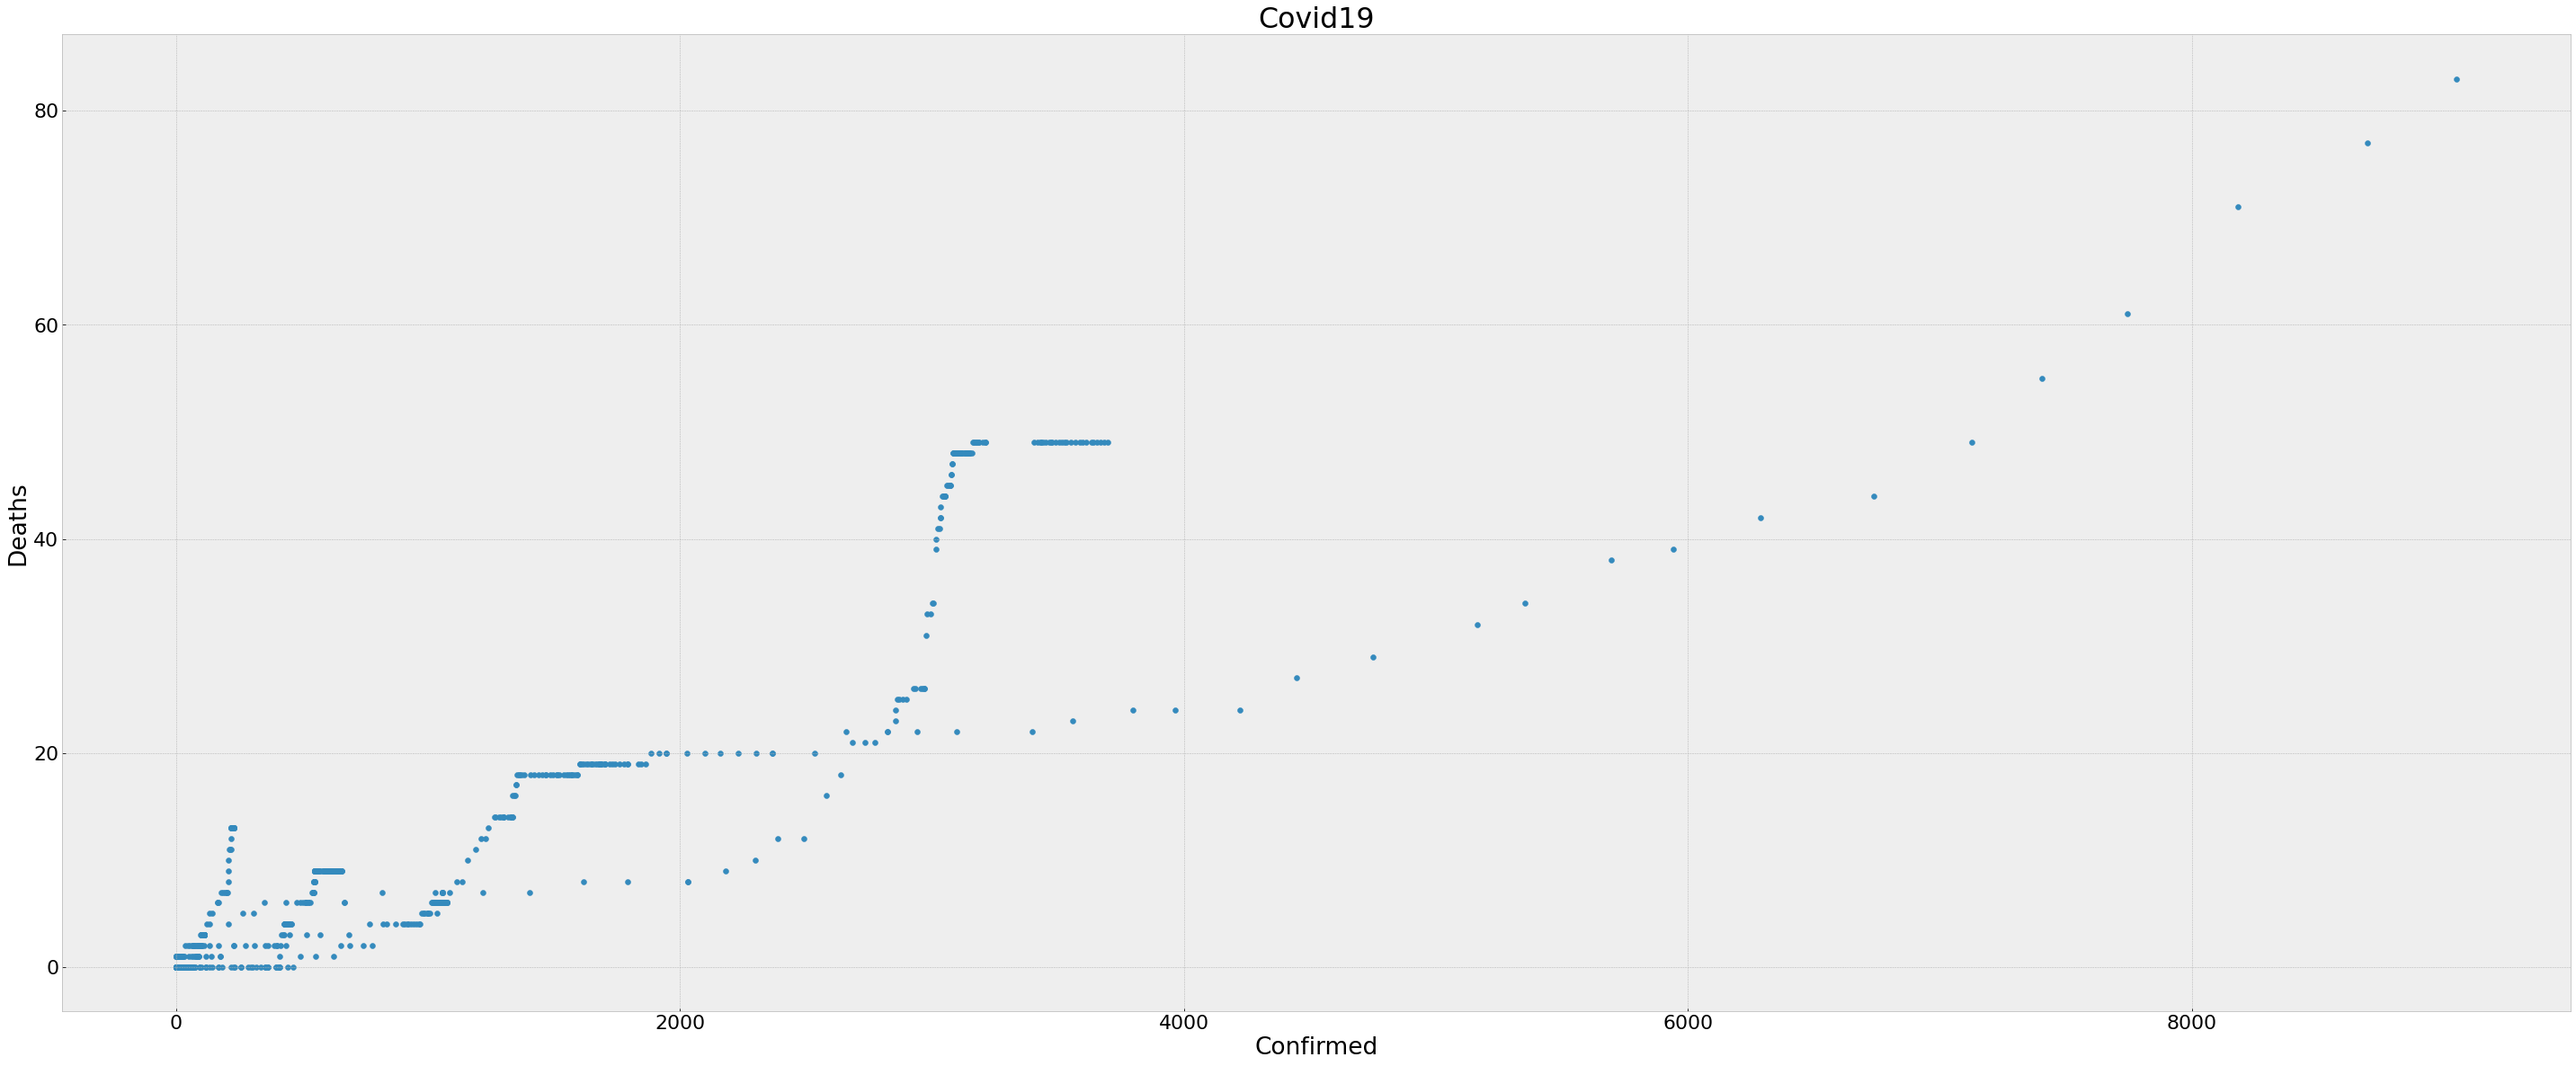

<Figure size 7200x3600 with 0 Axes>

<Figure size 7200x3600 with 0 Axes>

In [63]:
#Use scatter to identifier relationship between(Confirmed,Deaths)
plt.scatter((Australia['Confirmed'][:]),Australia['Deaths'][:])
plt.title('Covid19')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()
plt.figure(figsize=(100,50))

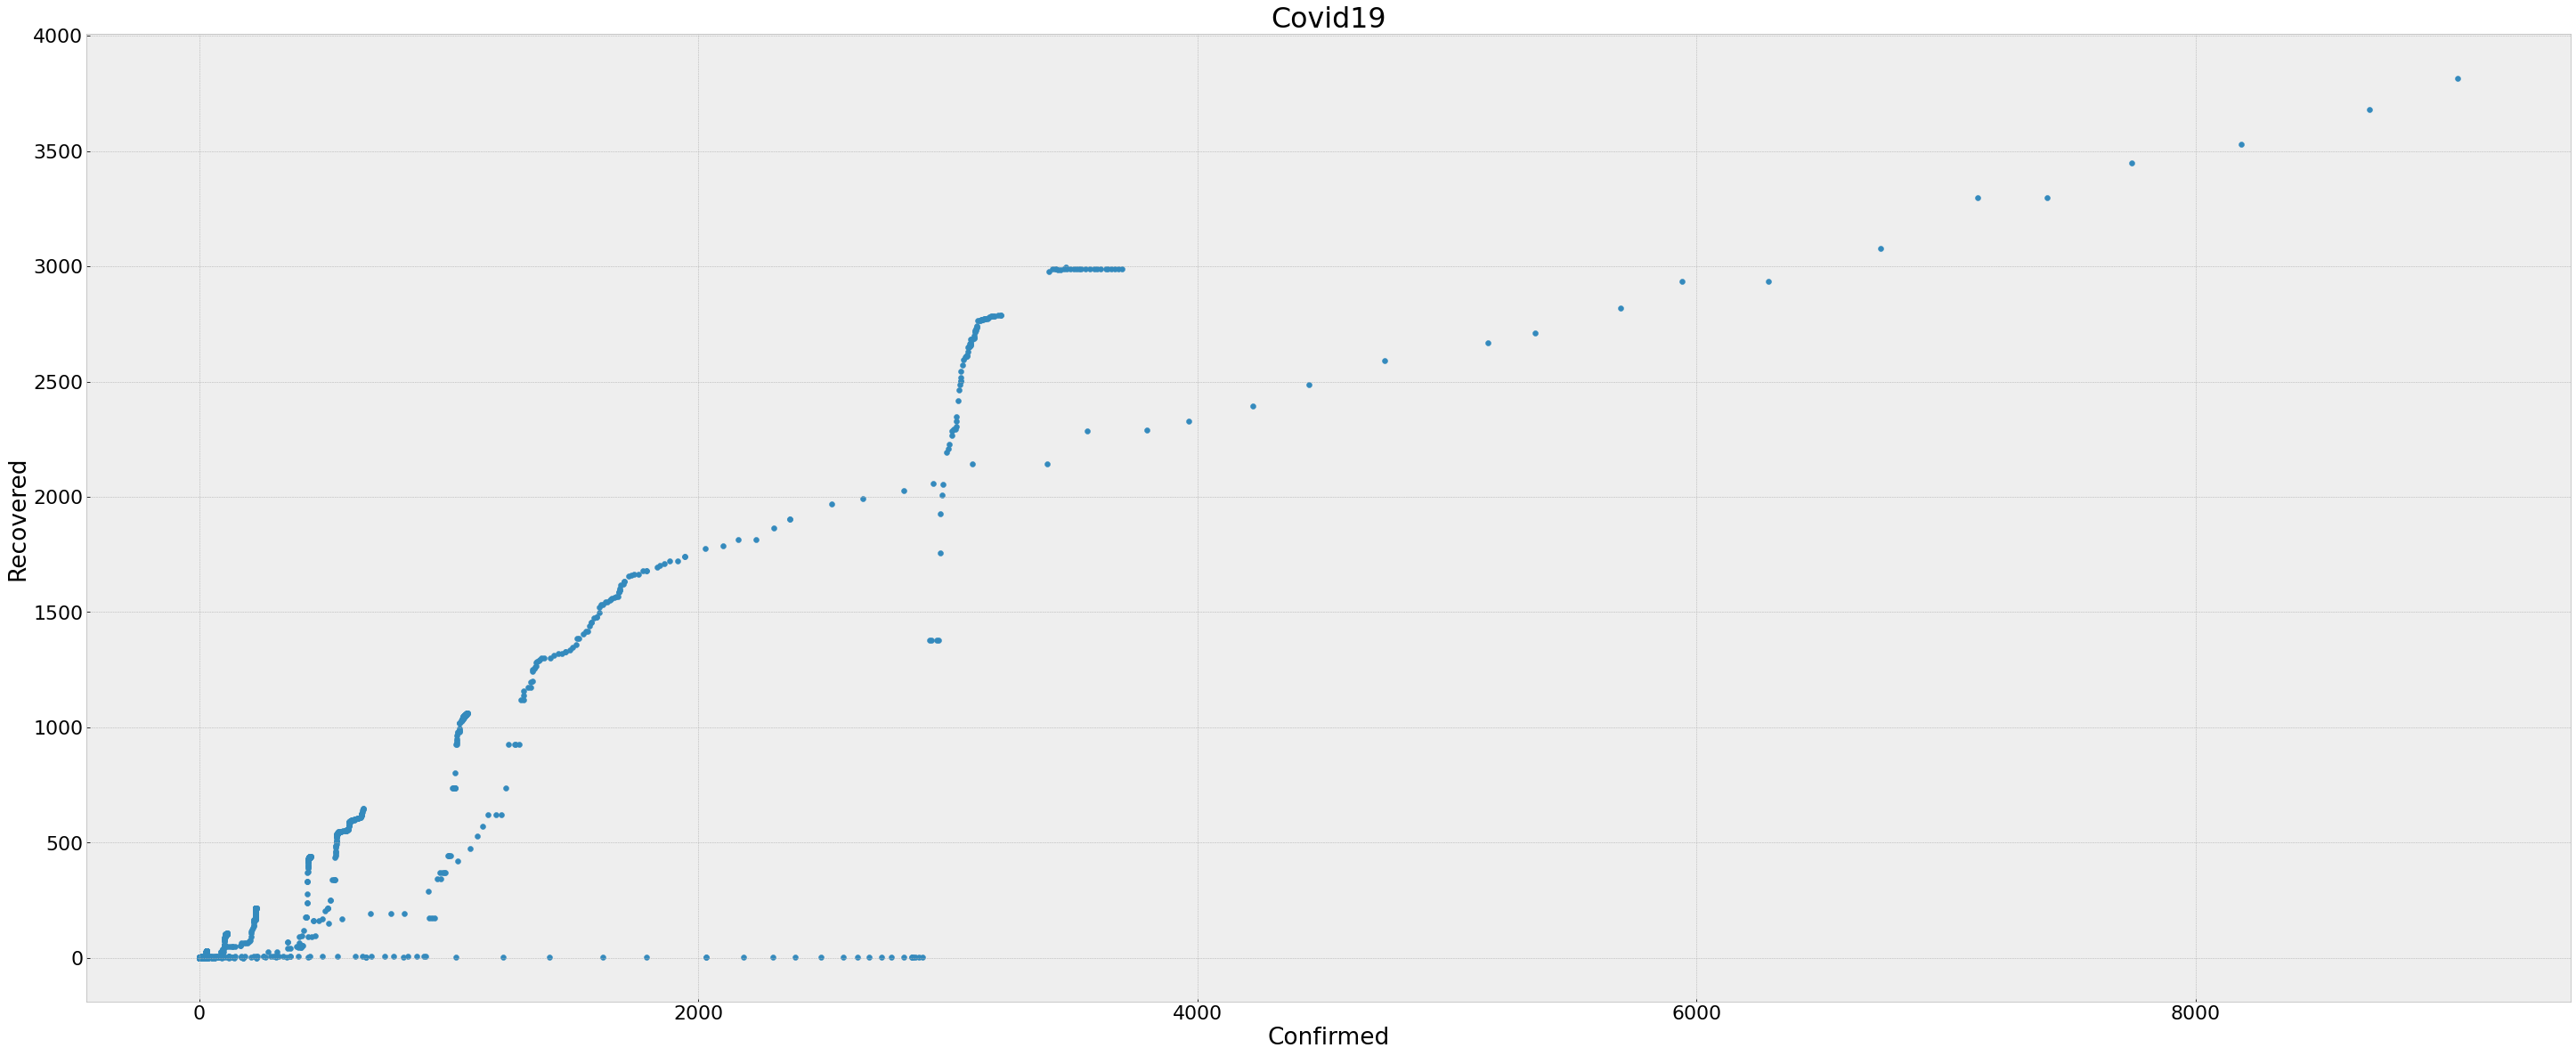

<Figure size 7200x3600 with 0 Axes>

<Figure size 7200x3600 with 0 Axes>

In [64]:
##Use scatter to identifier relationship between(Confirmed,Recovered)
plt.scatter((Australia['Confirmed'][:]),Australia['Recovered'][:])
plt.title('Covid19')
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.show()
plt.figure(figsize=(100,50))

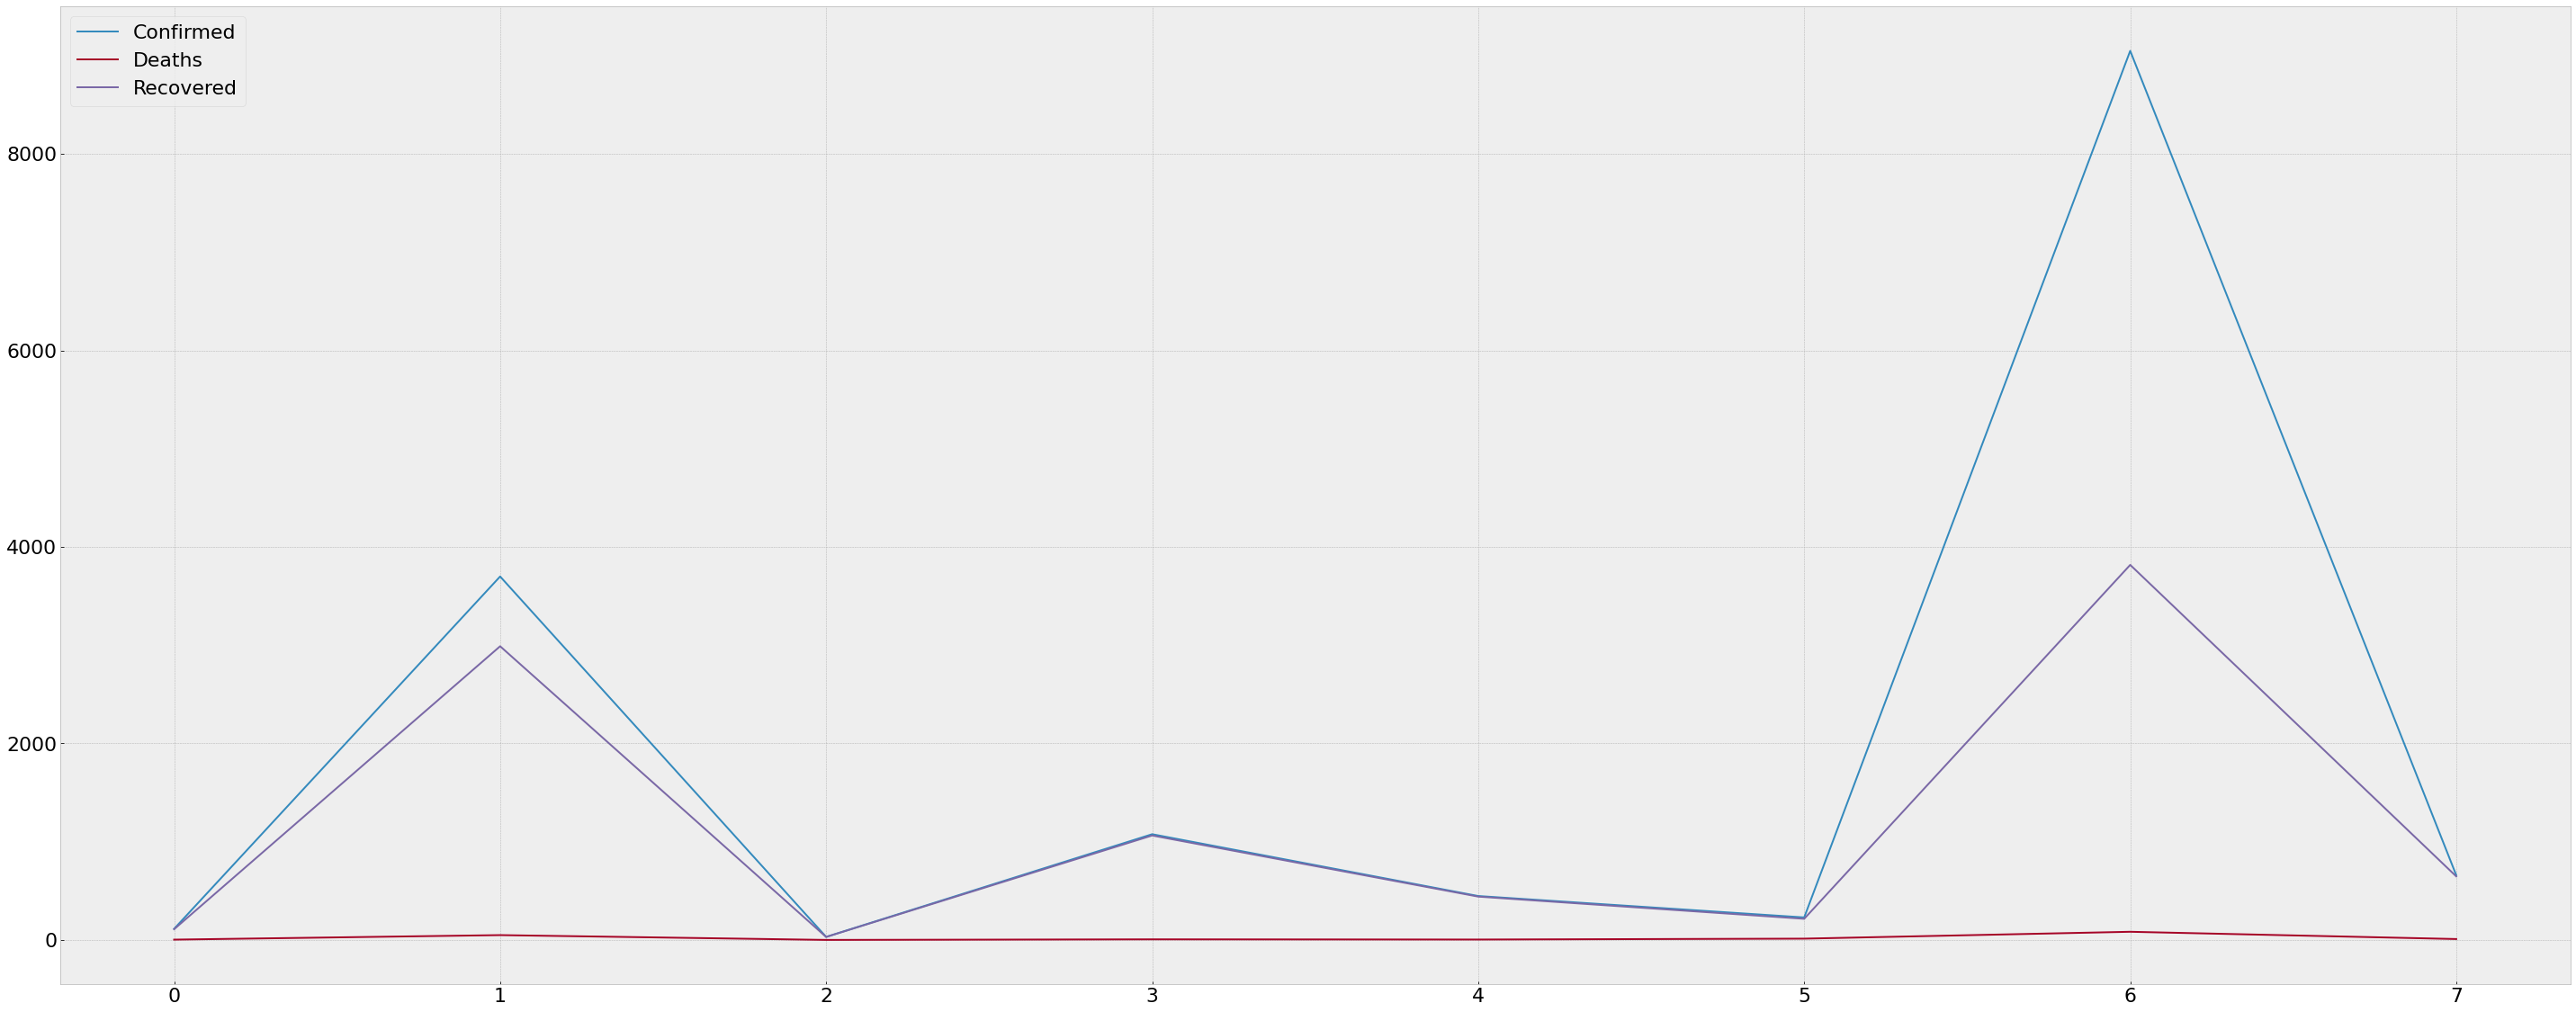

In [65]:
##Using a visualization plot to compare if (Province/State)change what happen( recovered, deaths ,Confirmed)
x= list(group_by_Australia_pie.index) 
plt.plot(x, group_by_Australia_pie['Confirmed'])
plt.plot(x,group_by_Australia_pie['Deaths'] )
plt.plot(x,group_by_Australia_pie['Recovered'])
plt.legend(['Confirmed','Deaths','Recovered'],loc="upper left")

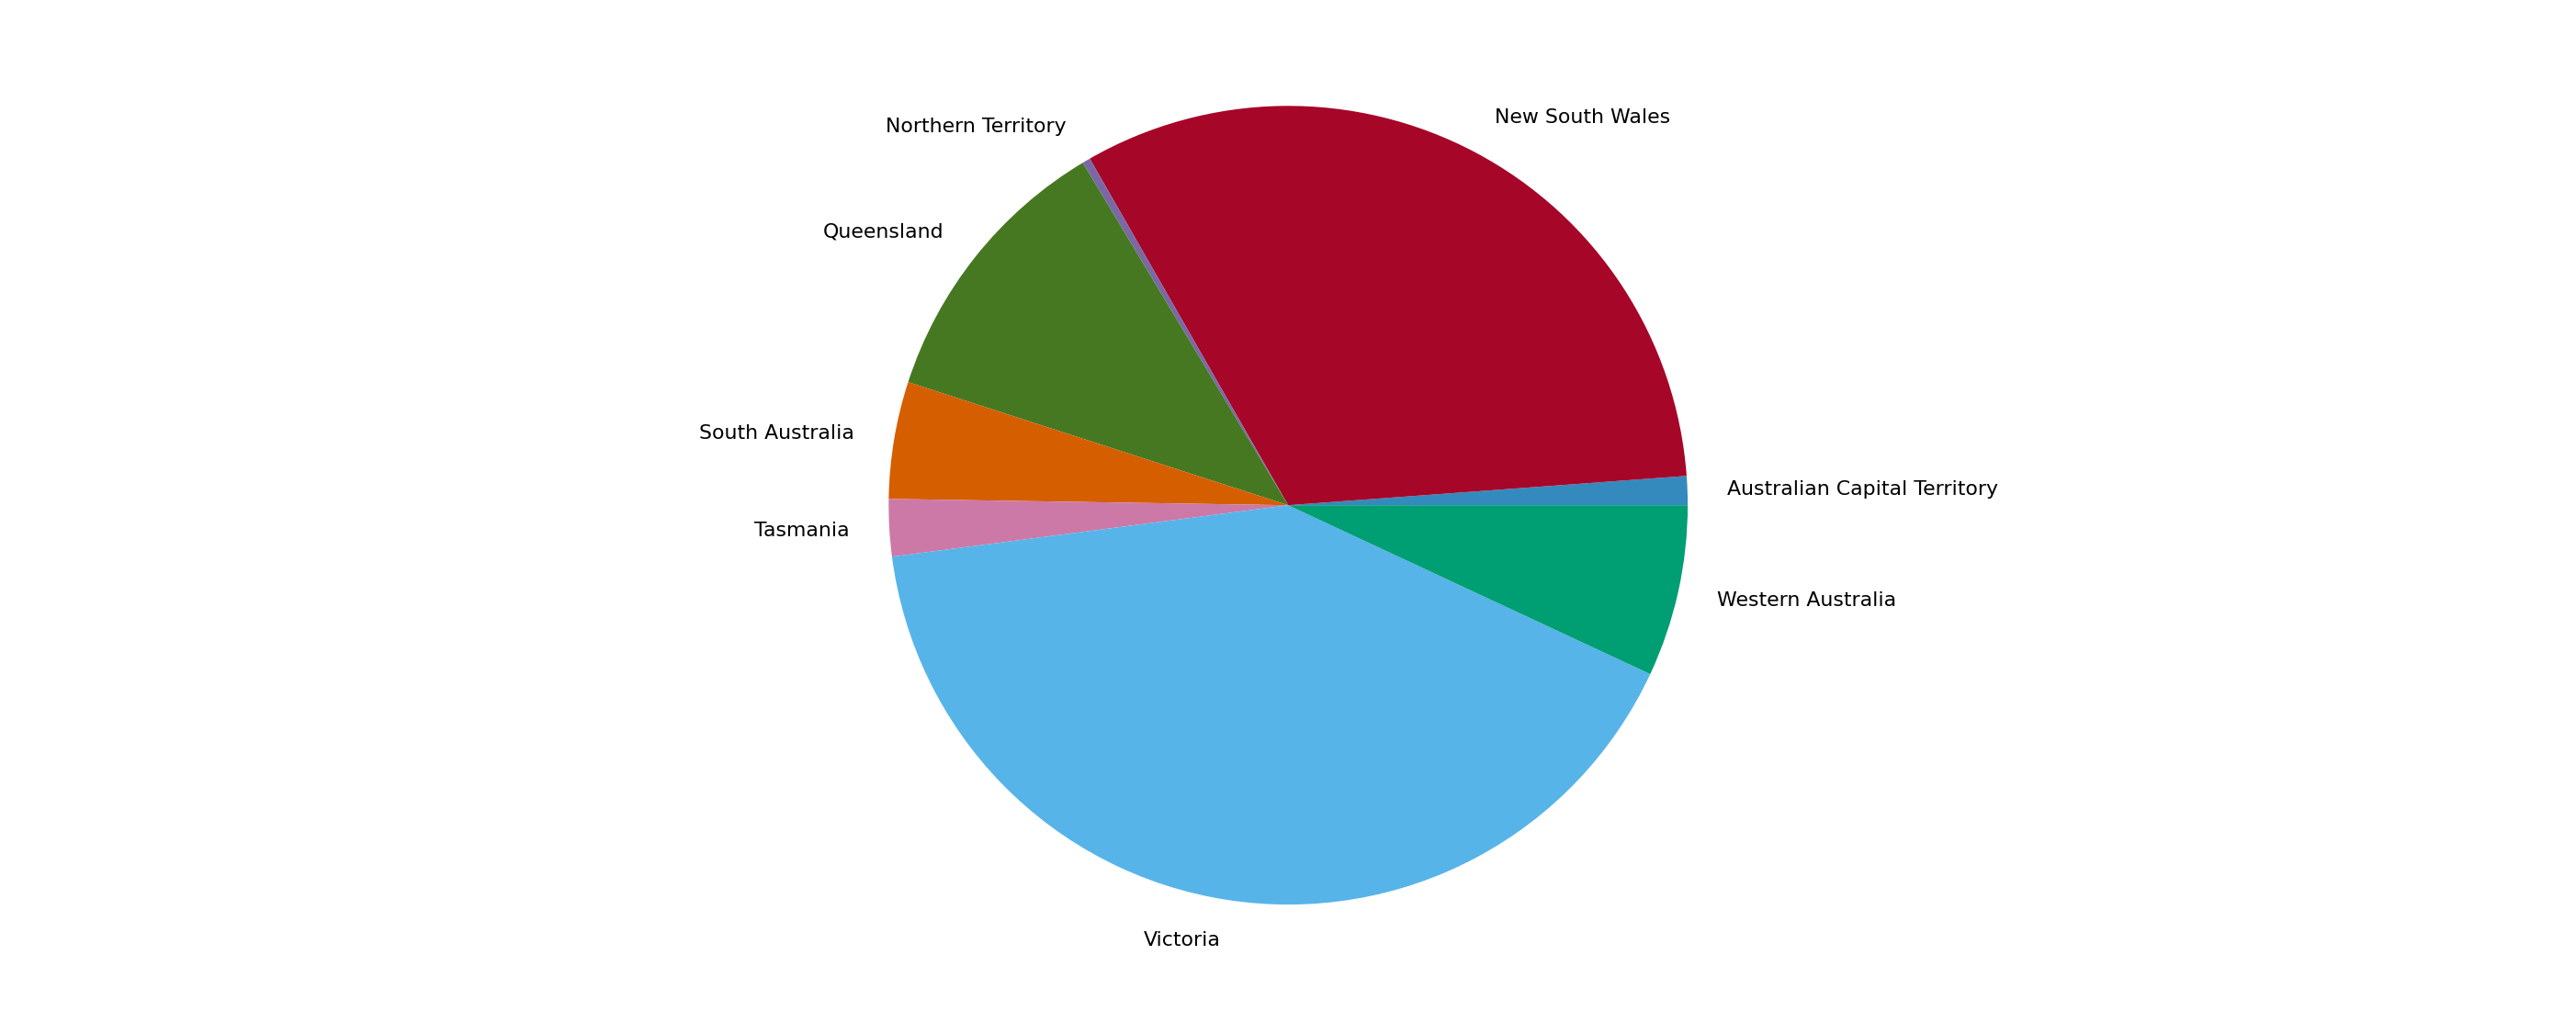

In [66]:
#Representation of Province/State in A pie plot to compare between each (each Province/State)
#and the other and to know Percentage of recovering  in the(each Province/State)
sums = group_by_Australia_pie.groupby(group_by_Australia_pie['Province/State'][:10])["Recovered"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

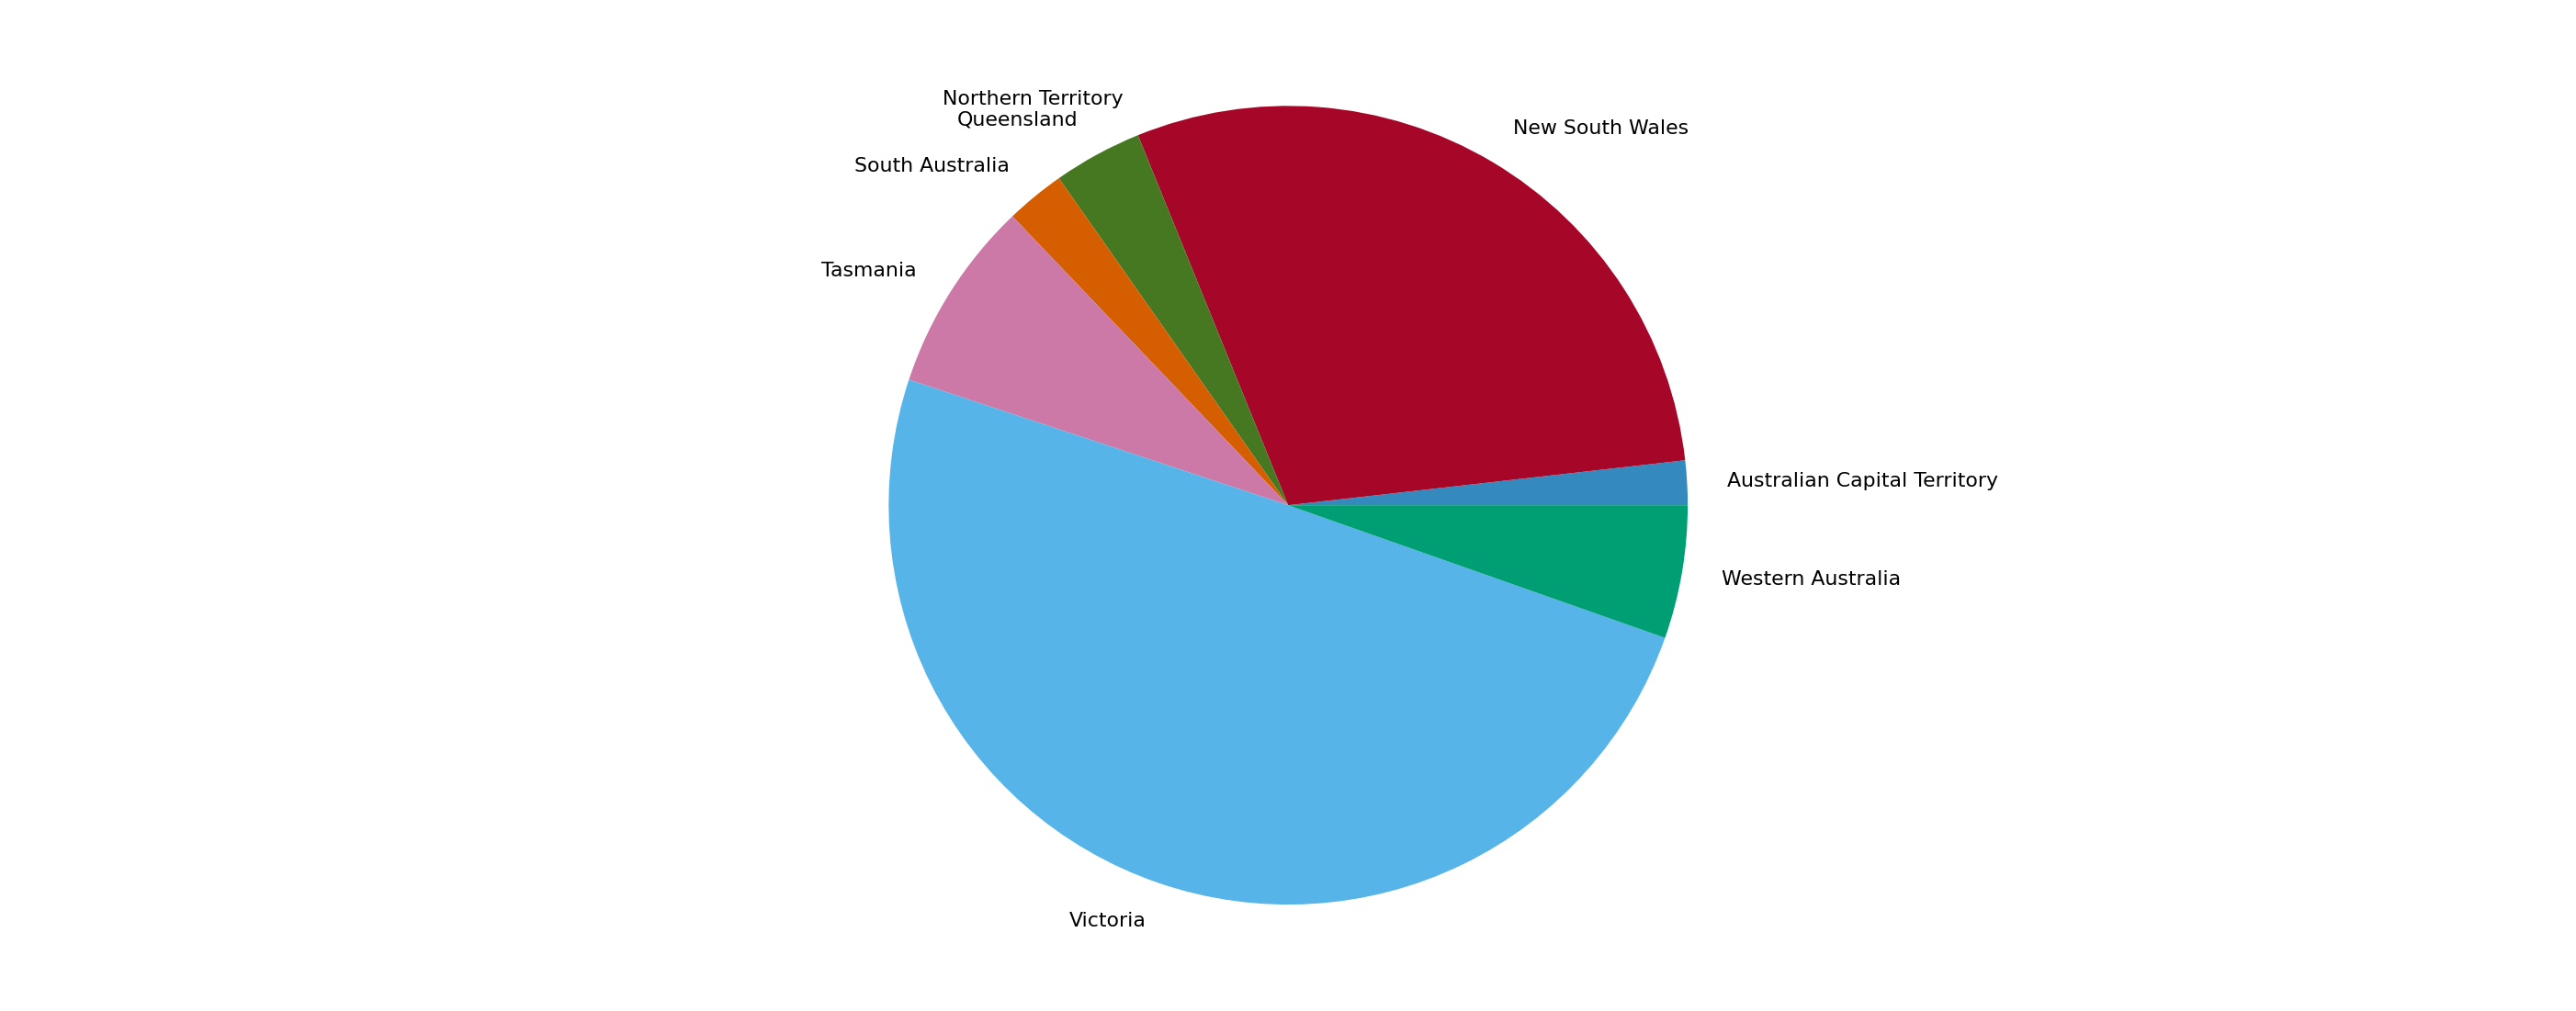

In [67]:
#Representation of Province/State in A pie plot to compare between each (each Province/State)
#and the other and to know Percentage of Deaths in the(each Province/State)
sums = group_by_Australia_pie.groupby(group_by_Australia_pie['Province/State'][:10])["Deaths"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

In [68]:
#Clarify the number of (Confirmed) and (Recovered) for each Province/State
df_ =group_by_Australia_pie
fig = px.line(df_, x='Province/State', y='Confirmed')
fig.add_scatter(x=df_['Province/State'], y=df_['Recovered'], mode='lines')
fig.show()

<BarContainer object of 8 artists>

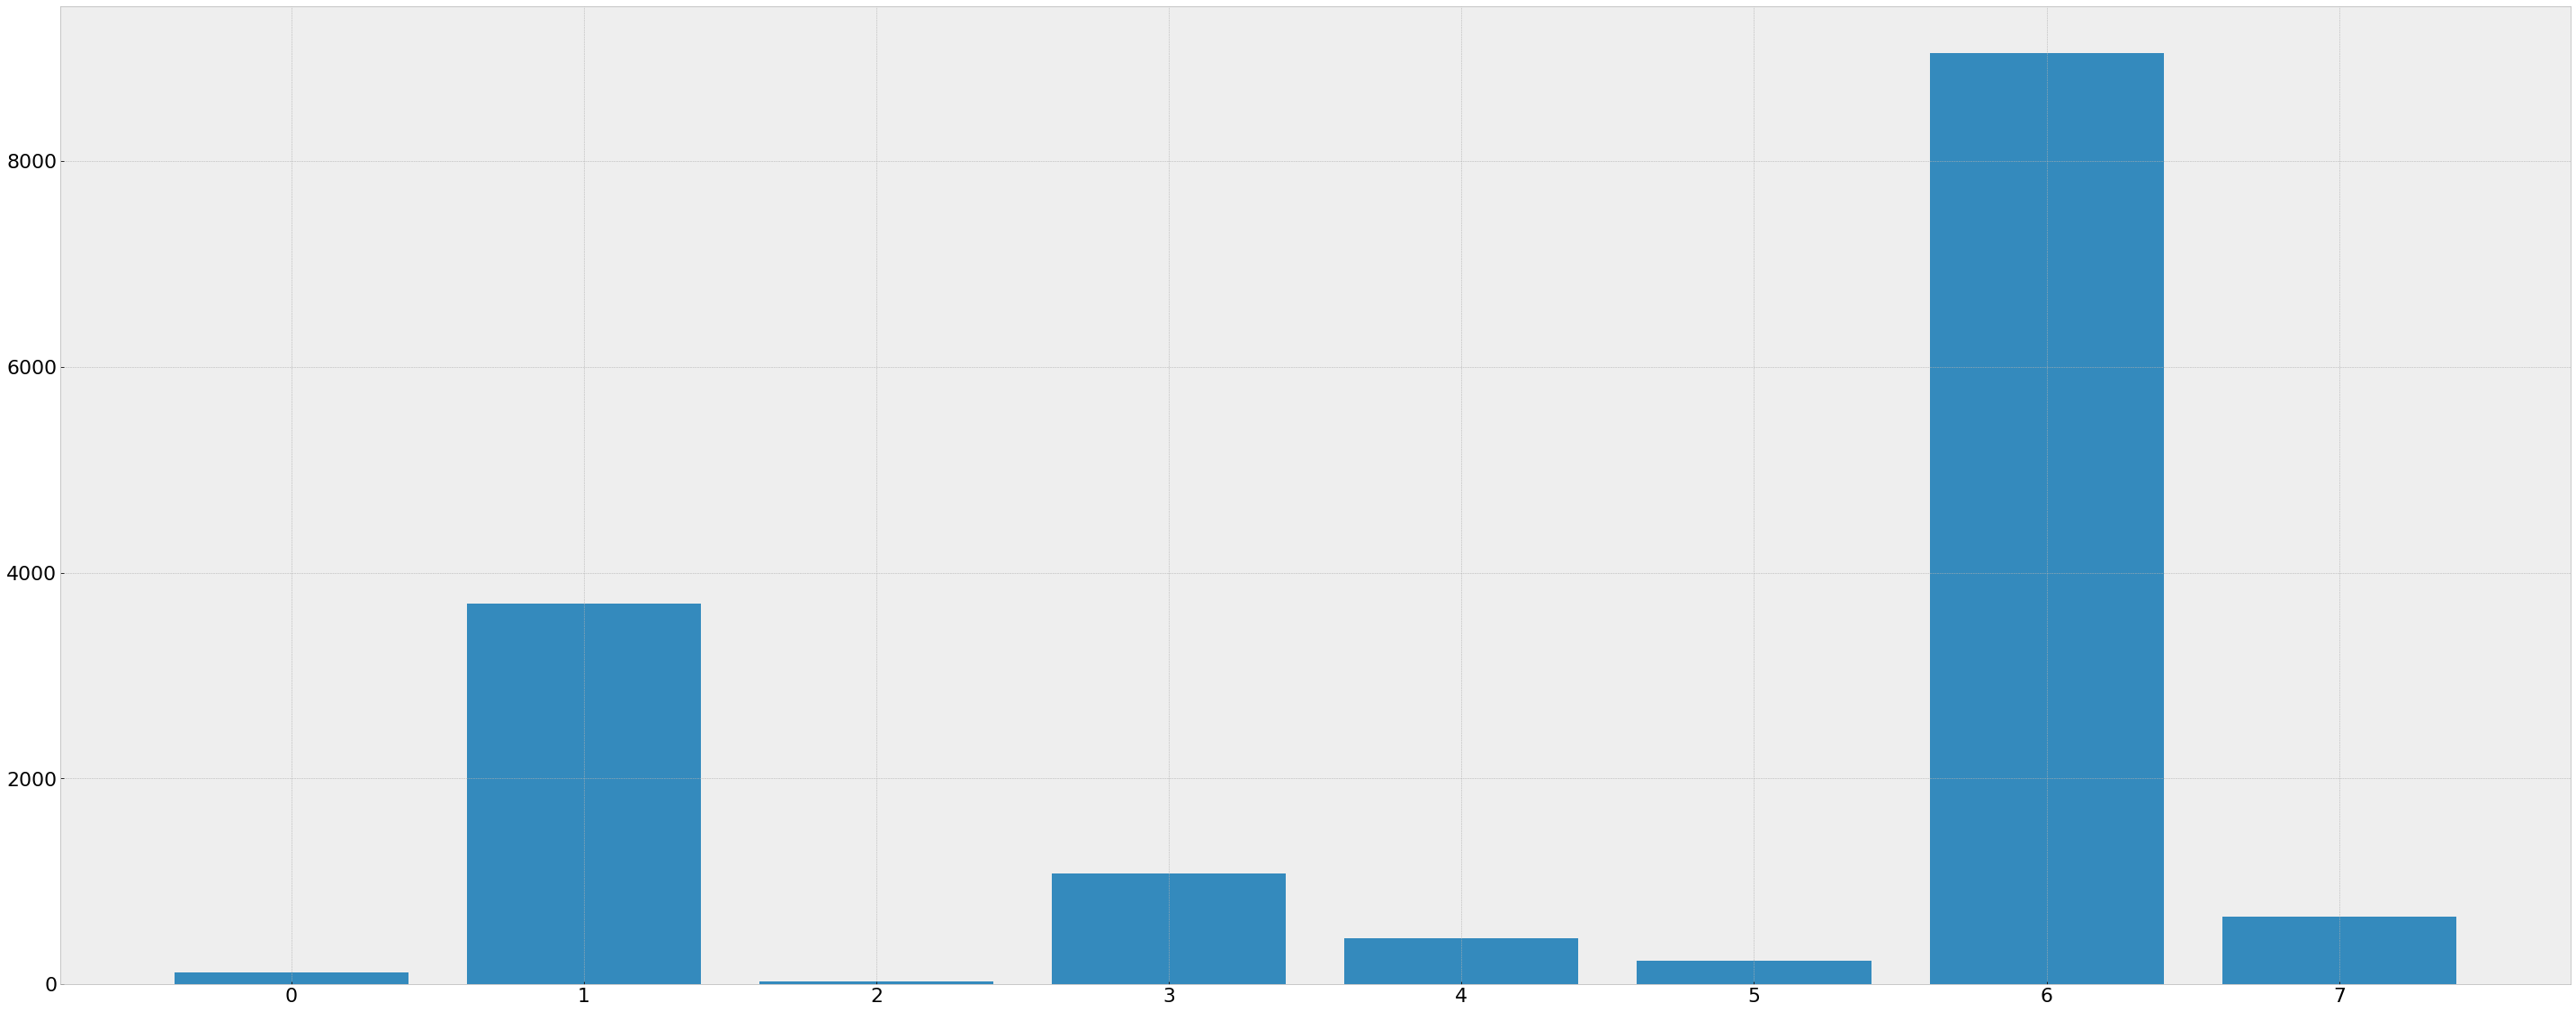

In [69]:
##Using a visualization plot bar to compare Between Province/State on the number of confirmed 
x=list(range(len(group_by_Australia_pie.index)))
plt.xticks (x, group_by_Australia_pie. index)
plt.bar(x[:10], group_by_Australia_pie["Confirmed" ][:10])

In [70]:
group_by_Australia_pie

Province/State  Confirmed  Recovered  Deaths
0  Australian Capital Territory        113        109       3
1               New South Wales       3699       2989      49
2            Northern Territory         31         30       0
3                    Queensland       1076       1063       6
4               South Australia        447        441       4
5                      Tasmania        229        215      13
6                      Victoria       9049       3817      83
7             Western Australia        659        647       9

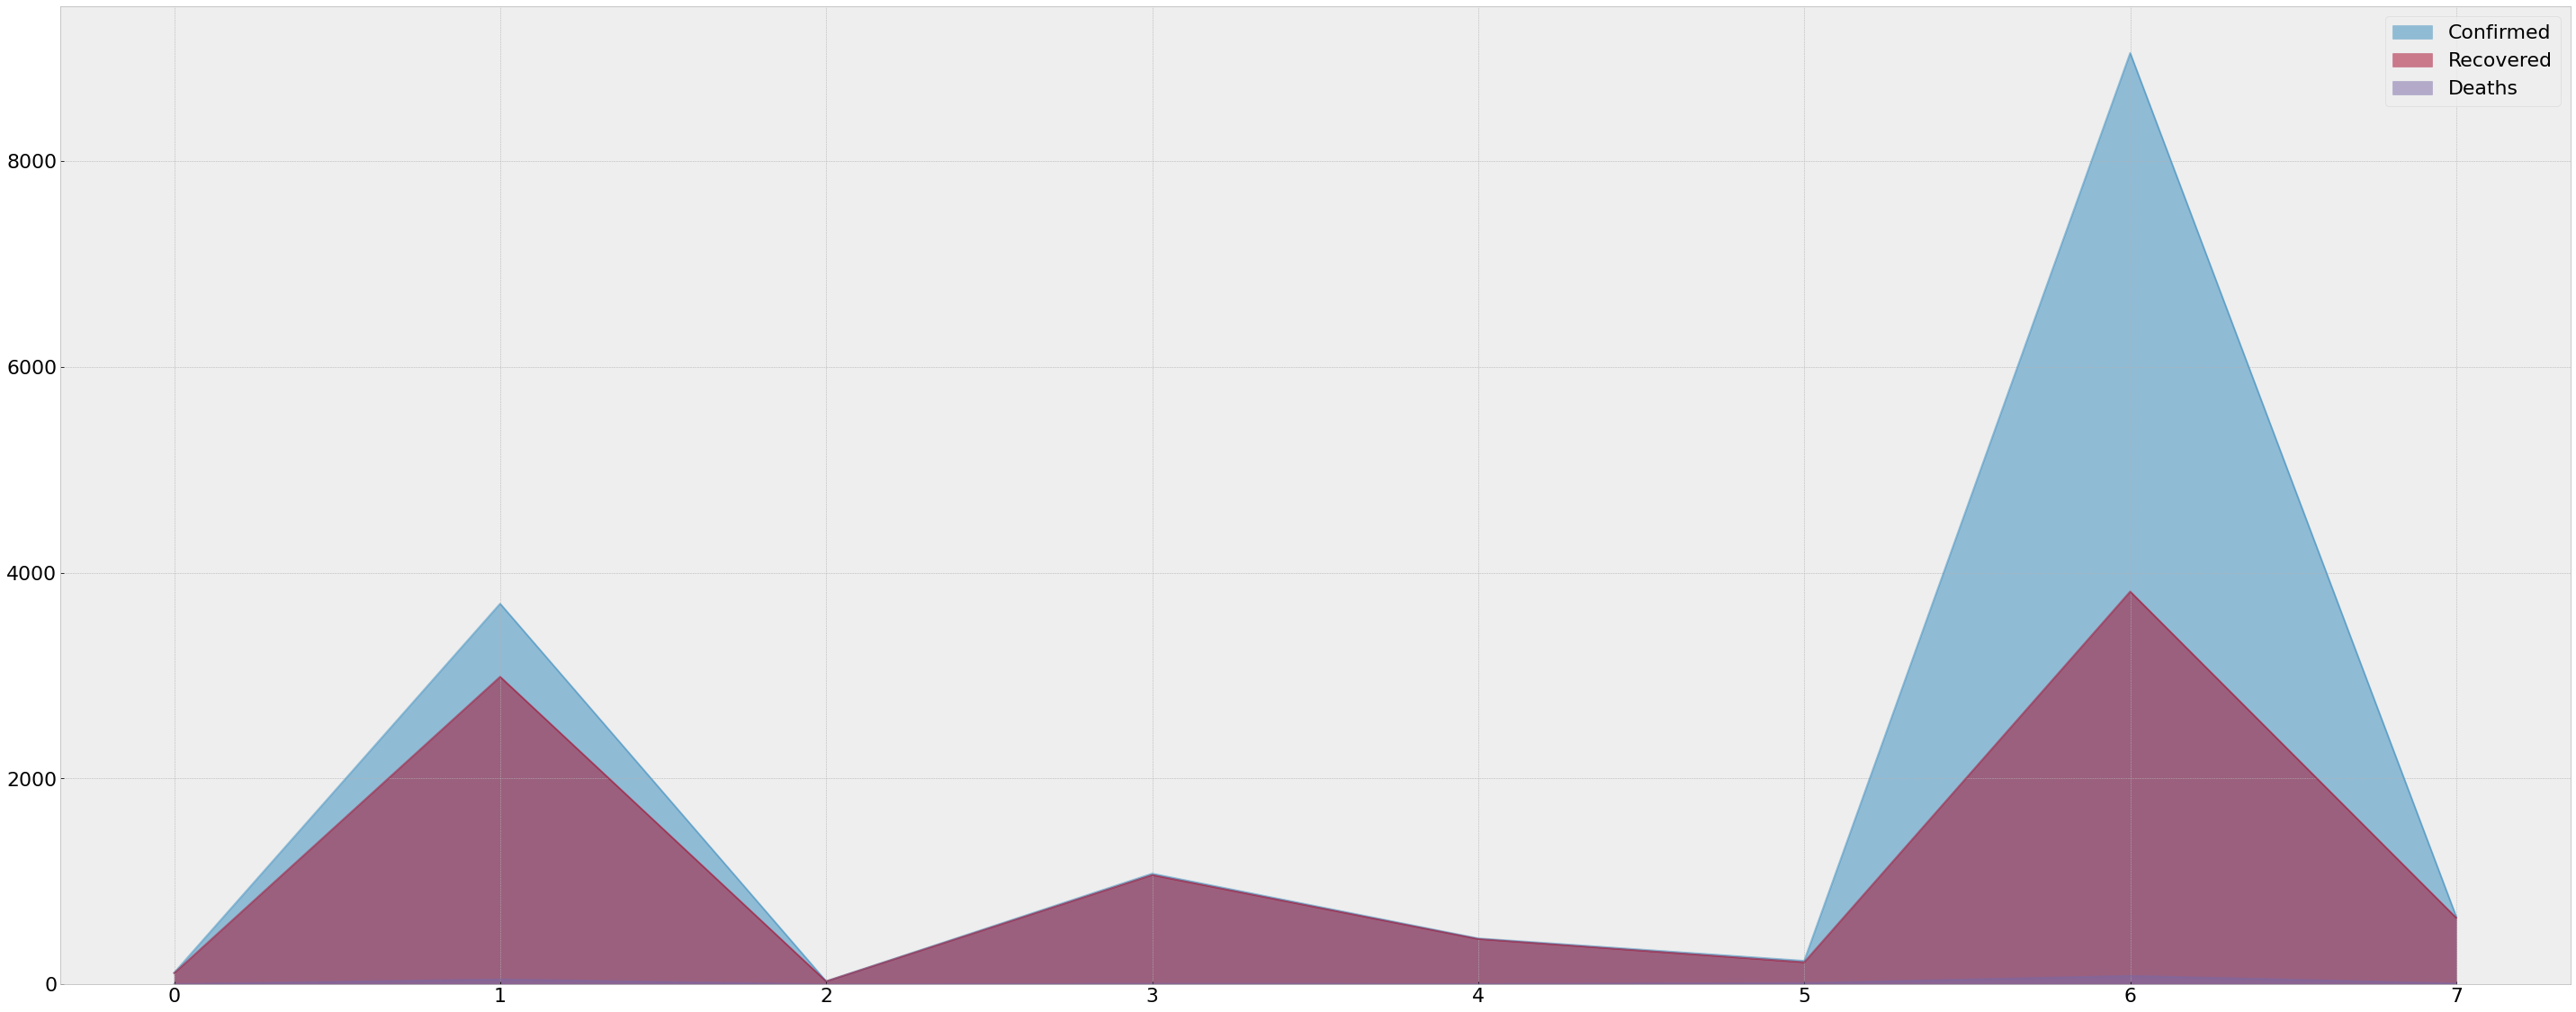

In [71]:
#plot.area is used to find out the cut areas for(data(group_by_Australia_pie))
group_by_Australia_pie.plot.area(stacked=False);

In [72]:
Australia

Province/State Country/Region      Lat      Long  \
Date                                                                         
2020-01-22  Australian Capital Territory      Australia -35.4735  149.0124   
2020-01-22               New South Wales      Australia -33.8688  151.2093   
2020-01-22            Northern Territory      Australia -12.4634  130.8456   
2020-01-22                    Queensland      Australia -27.4698  153.0251   
2020-01-22               South Australia      Australia -34.9285  138.6007   
...                                  ...            ...      ...       ...   
2020-07-27                    Queensland      Australia -27.4698  153.0251   
2020-07-27               South Australia      Australia -34.9285  138.6007   
2020-07-27                      Tasmania      Australia -42.8821  147.3272   
2020-07-27                      Victoria      Australia -37.8136  144.9631   
2020-07-27             Western Australia      Australia -31.9505  115.8605   

                 Date  Confirmed  Deaths  Recovered  Active       WHO Region  
Date                                                                          
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
...               ...        ...     ...        ...     ...              ...  
2020-07-27 2020-07-27       1076       6       1063       7  Western Pacific  
2020-07-27 2020-07-27        447       4        441       2  Western Pacific  
2020-07-27 2020-07-27        229      13        215       1  Western Pacific  
2020-07-27 2020-07-27       9049      83       3817    5149  Western Pacific  
2020-07-27 2020-07-27        659       9        647       3  Western Pacific  

[1504 rows x 10 columns]

In [73]:
d1 =Australia.iloc[:, [5,7]].values

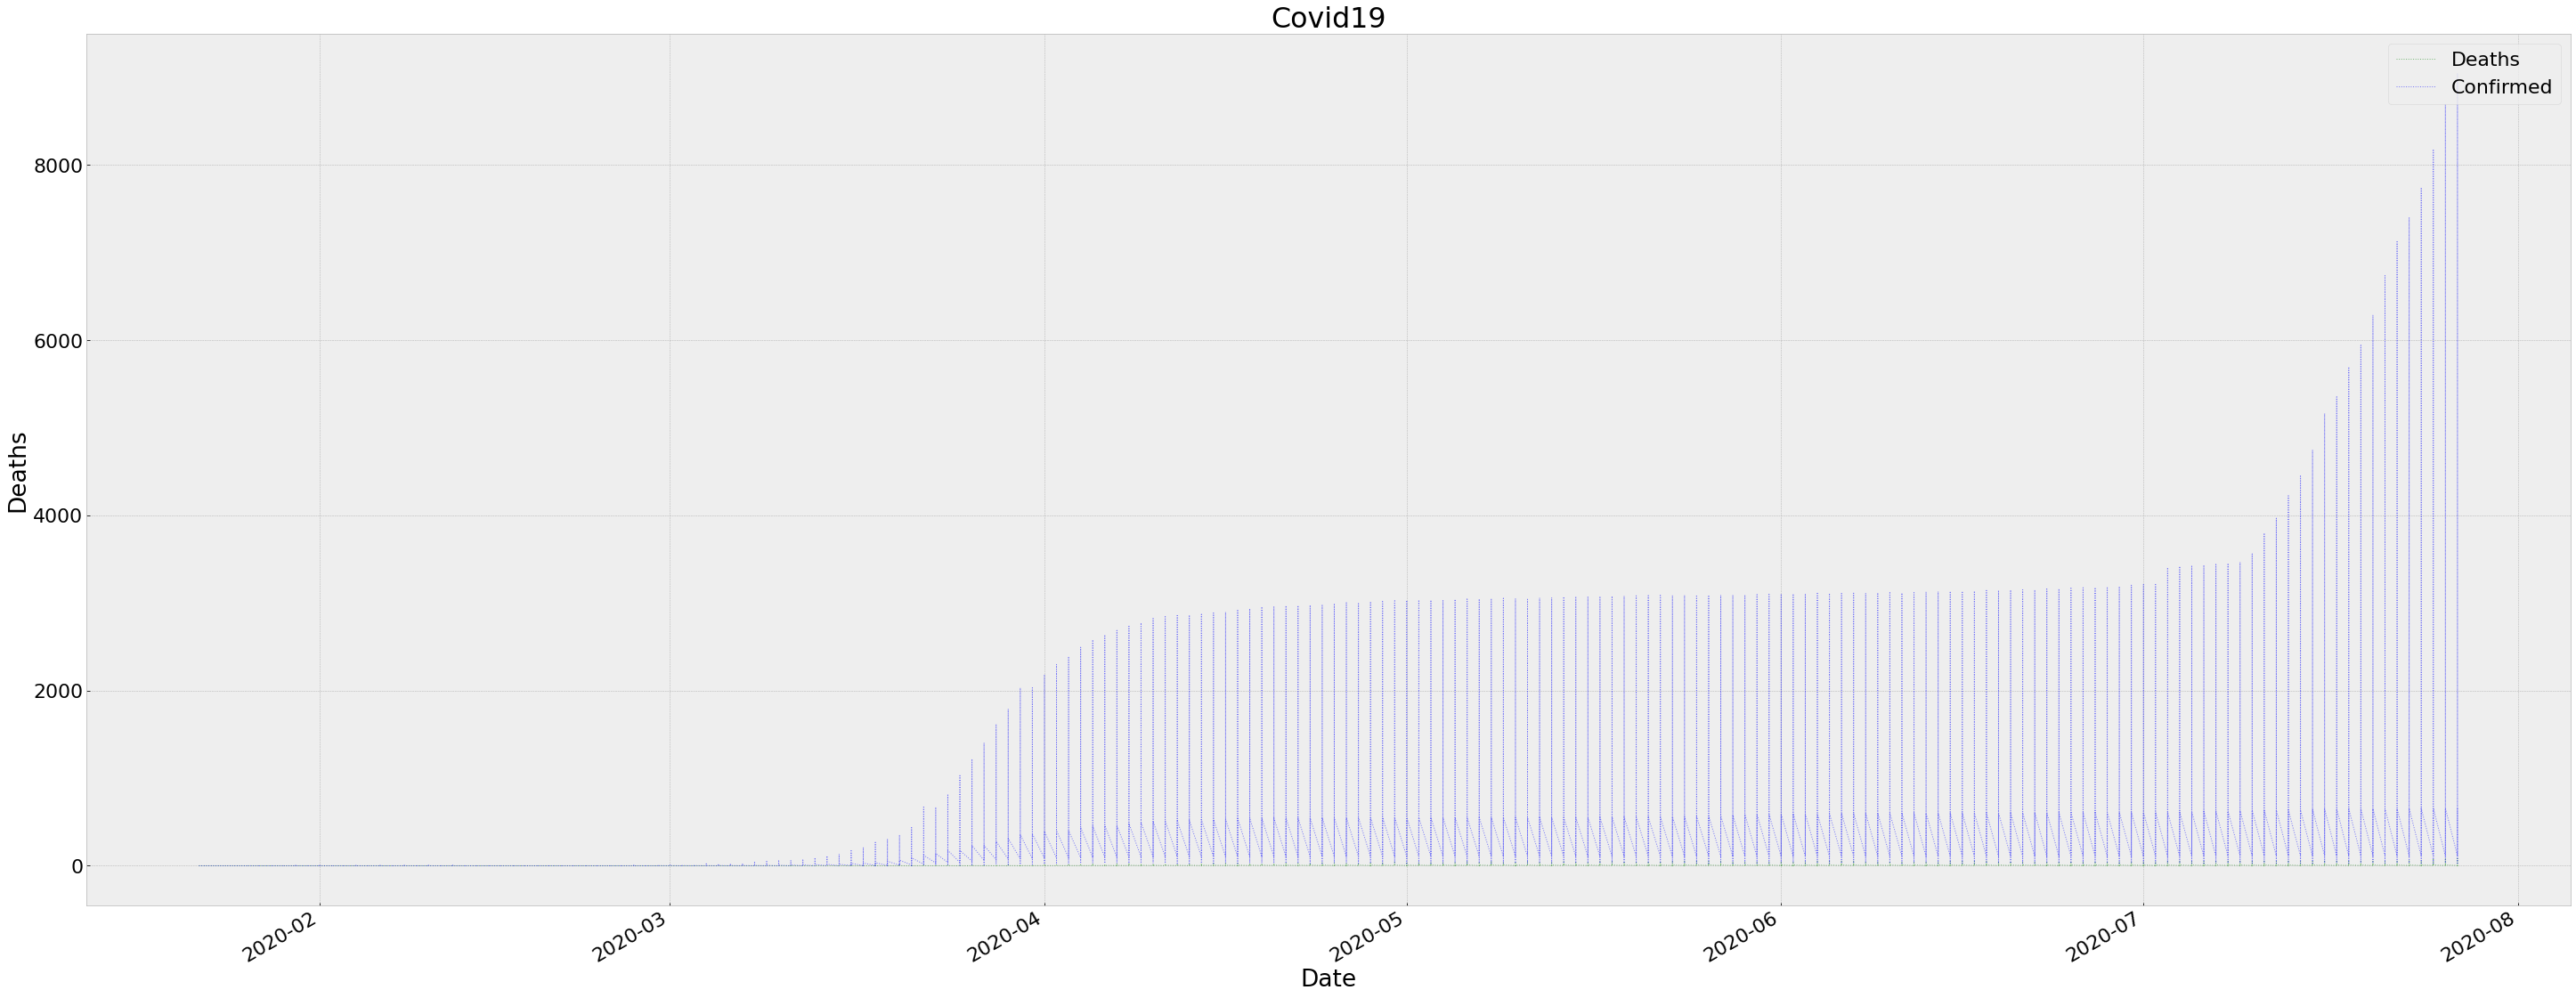

In [74]:
#Comparing the increase in days for deaths
Australia.Deaths.plot(kind ="line", color ="g", label ="Deaths", linewidth =1, alpha =.5, grid =True, linestyle =":")
Australia.Confirmed.plot(color ="b", label ="Confirmed", linewidth =1, alpha= .5, grid =True, linestyle =":")
plt.legend(loc="upper right")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title("Covid19")
plt.show()

In [75]:
Australia

Province/State Country/Region      Lat      Long  \
Date                                                                         
2020-01-22  Australian Capital Territory      Australia -35.4735  149.0124   
2020-01-22               New South Wales      Australia -33.8688  151.2093   
2020-01-22            Northern Territory      Australia -12.4634  130.8456   
2020-01-22                    Queensland      Australia -27.4698  153.0251   
2020-01-22               South Australia      Australia -34.9285  138.6007   
...                                  ...            ...      ...       ...   
2020-07-27                    Queensland      Australia -27.4698  153.0251   
2020-07-27               South Australia      Australia -34.9285  138.6007   
2020-07-27                      Tasmania      Australia -42.8821  147.3272   
2020-07-27                      Victoria      Australia -37.8136  144.9631   
2020-07-27             Western Australia      Australia -31.9505  115.8605   

                 Date  Confirmed  Deaths  Recovered  Active       WHO Region  
Date                                                                          
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
...               ...        ...     ...        ...     ...              ...  
2020-07-27 2020-07-27       1076       6       1063       7  Western Pacific  
2020-07-27 2020-07-27        447       4        441       2  Western Pacific  
2020-07-27 2020-07-27        229      13        215       1  Western Pacific  
2020-07-27 2020-07-27       9049      83       3817    5149  Western Pacific  
2020-07-27 2020-07-27        659       9        647       3  Western Pacific  

[1504 rows x 10 columns]

In [76]:
data2=Australia.iloc[:,[5,6]].values

In [77]:
import scipy.cluster.hierarchy as shc

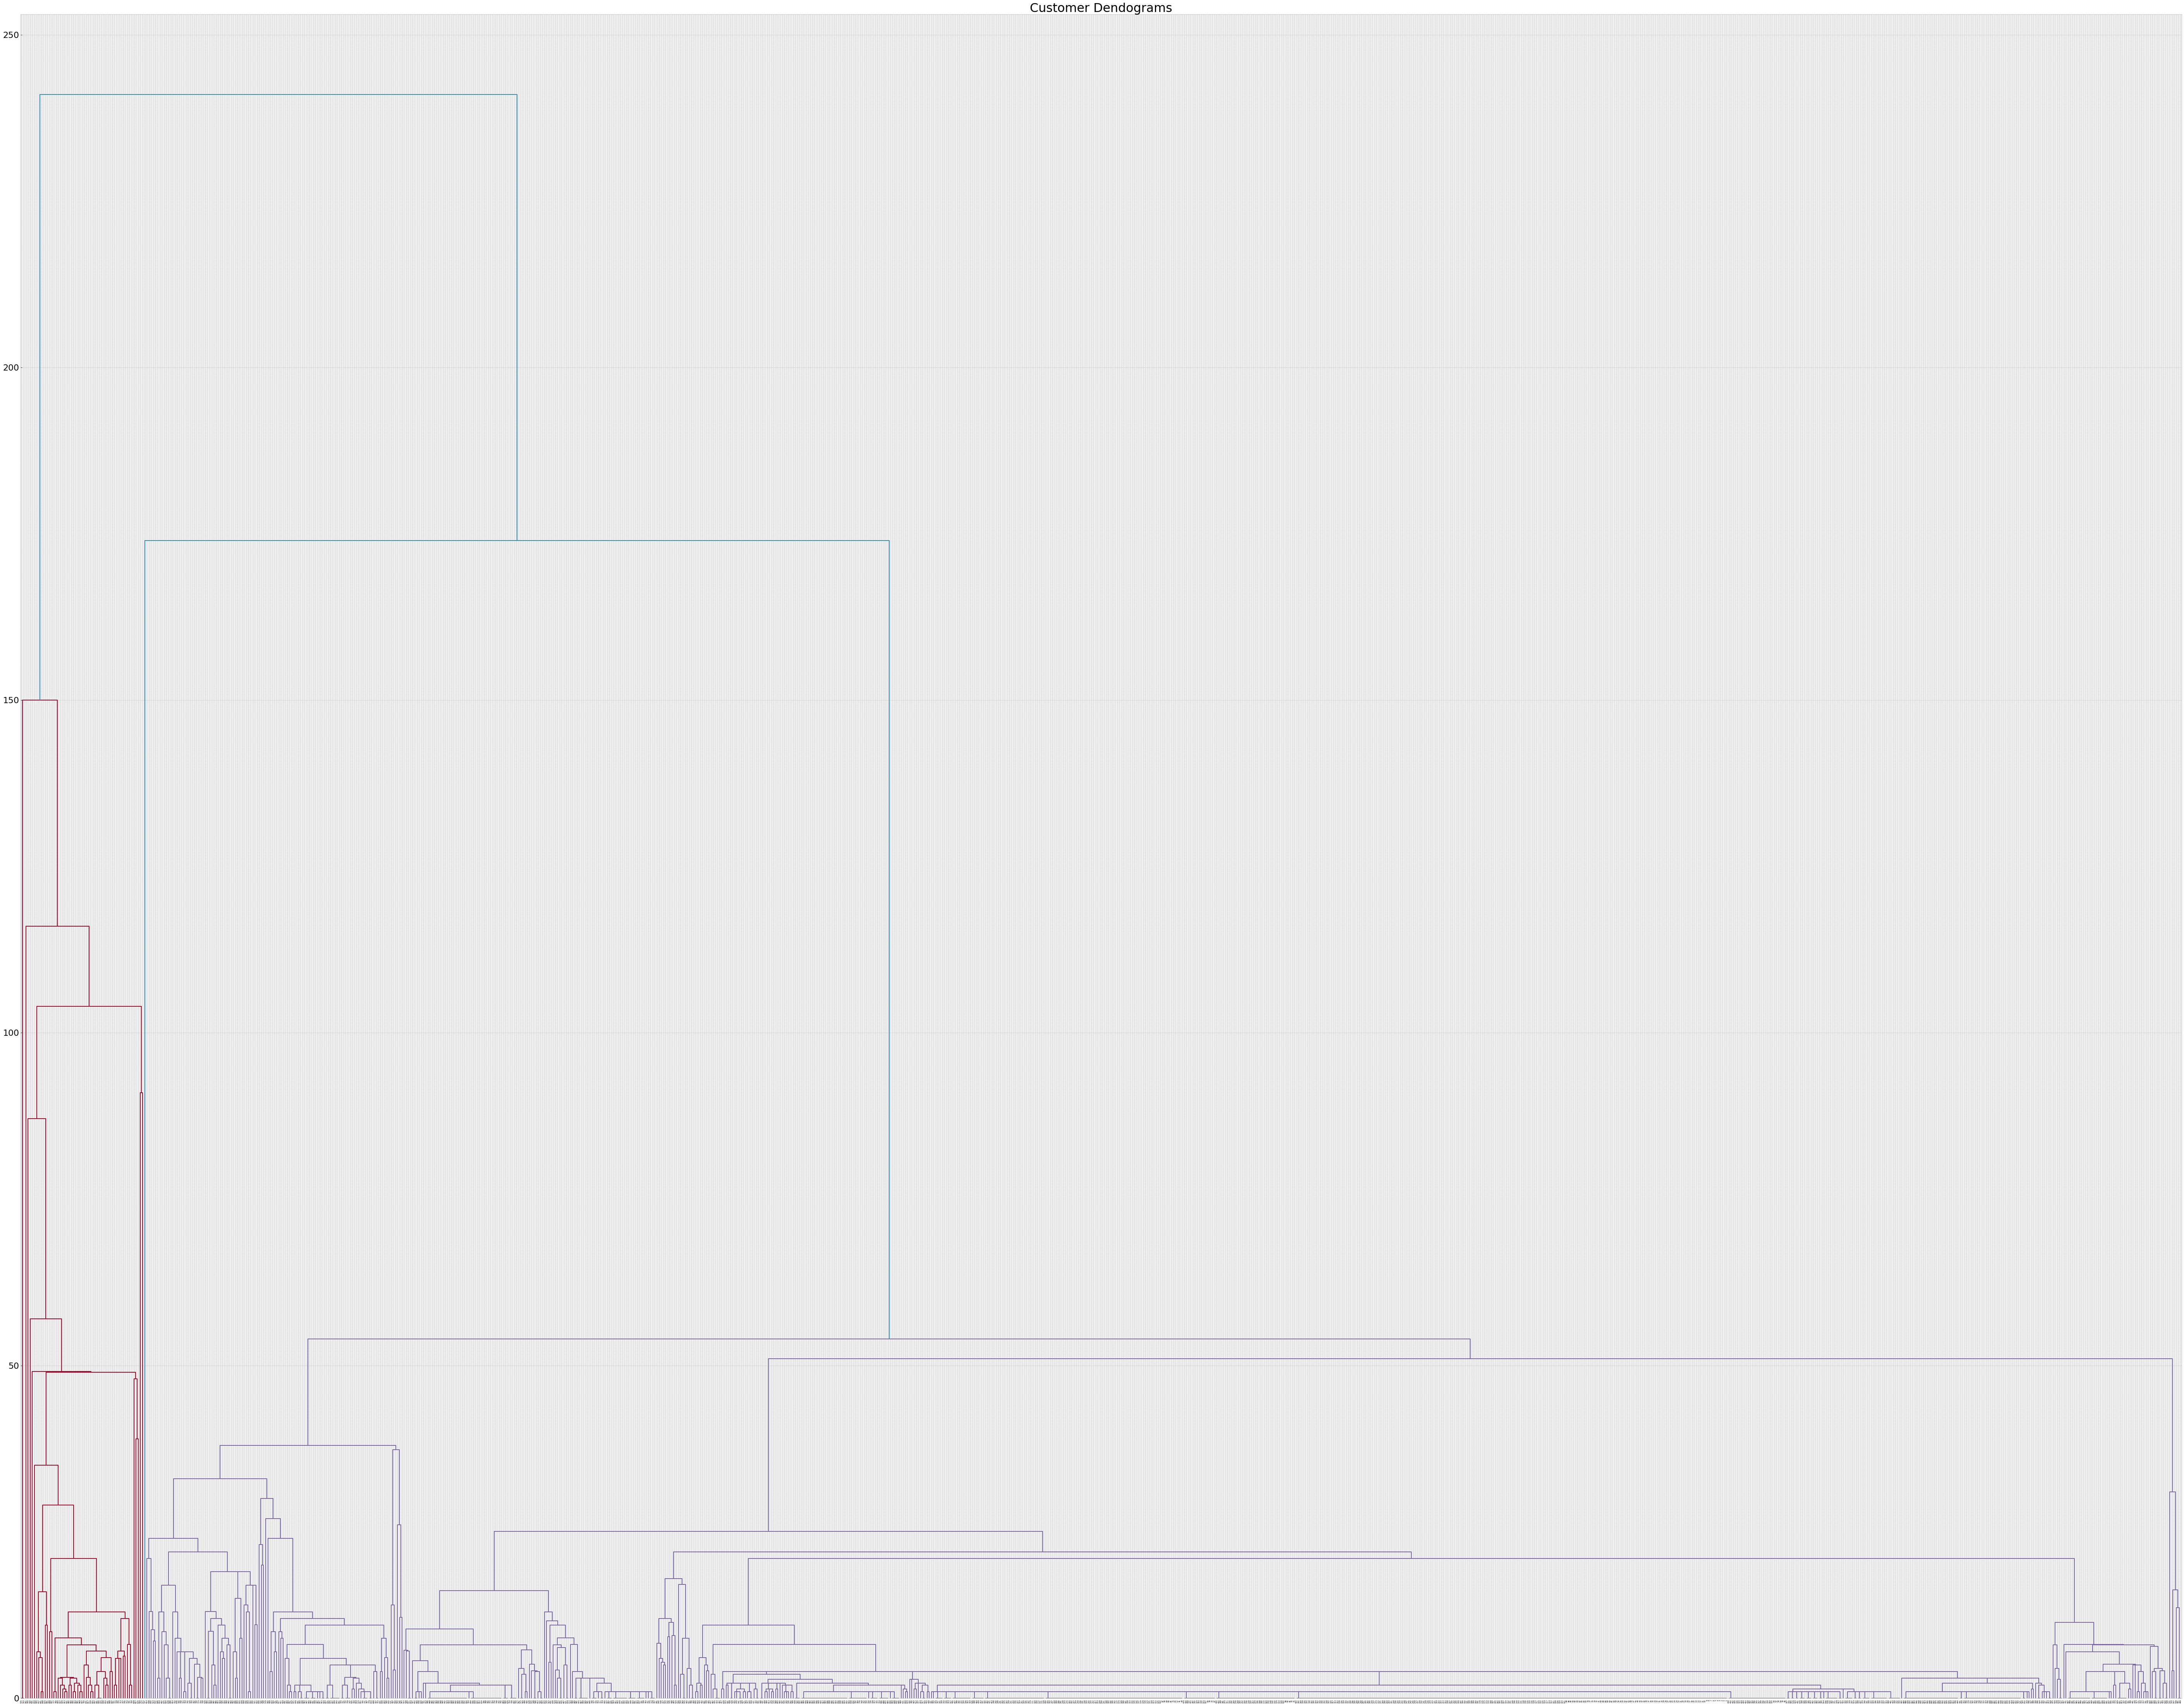

In [78]:
#Divide the data into groups by (hierarchy)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(100, 80))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data2[:1000], method='single'))

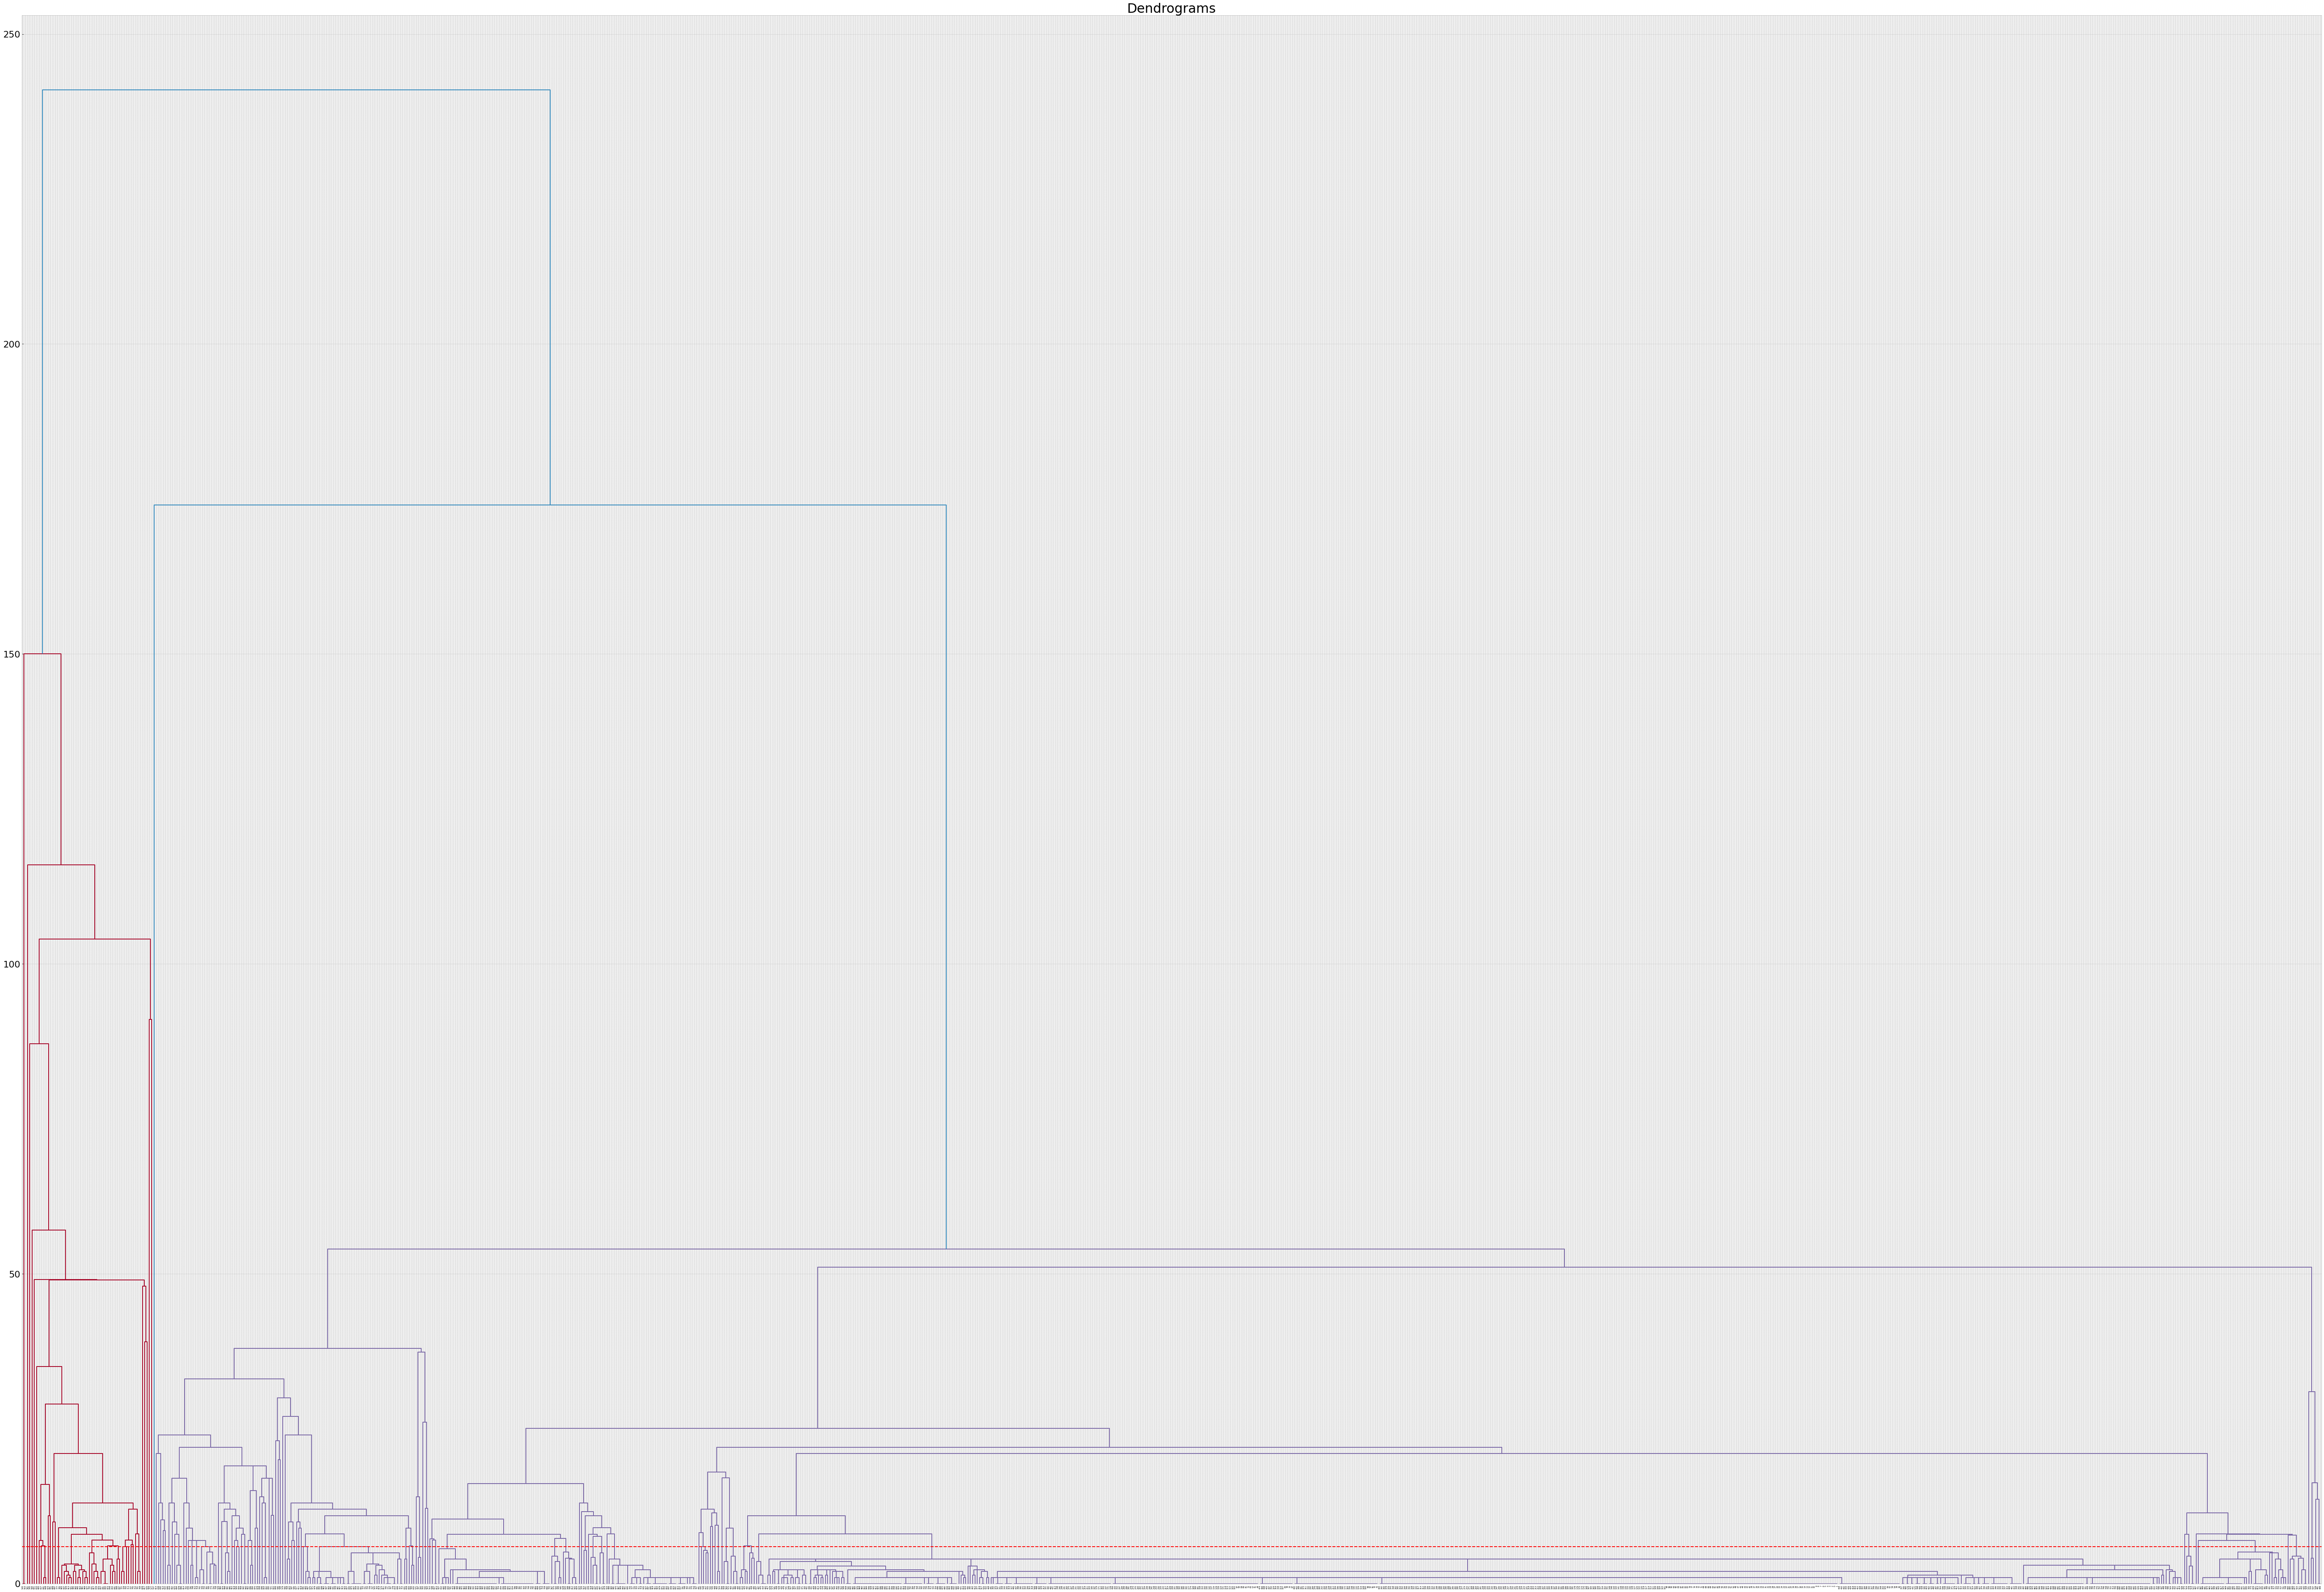

In [79]:
#Divide the data into groups by drawing a line to show the number of groups
plt.figure(figsize=(100, 70))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data2[:1000], method='single'))
plt.axhline(y=6, color='r', linestyle='--')

<AxesSubplot:xlabel='Date'>

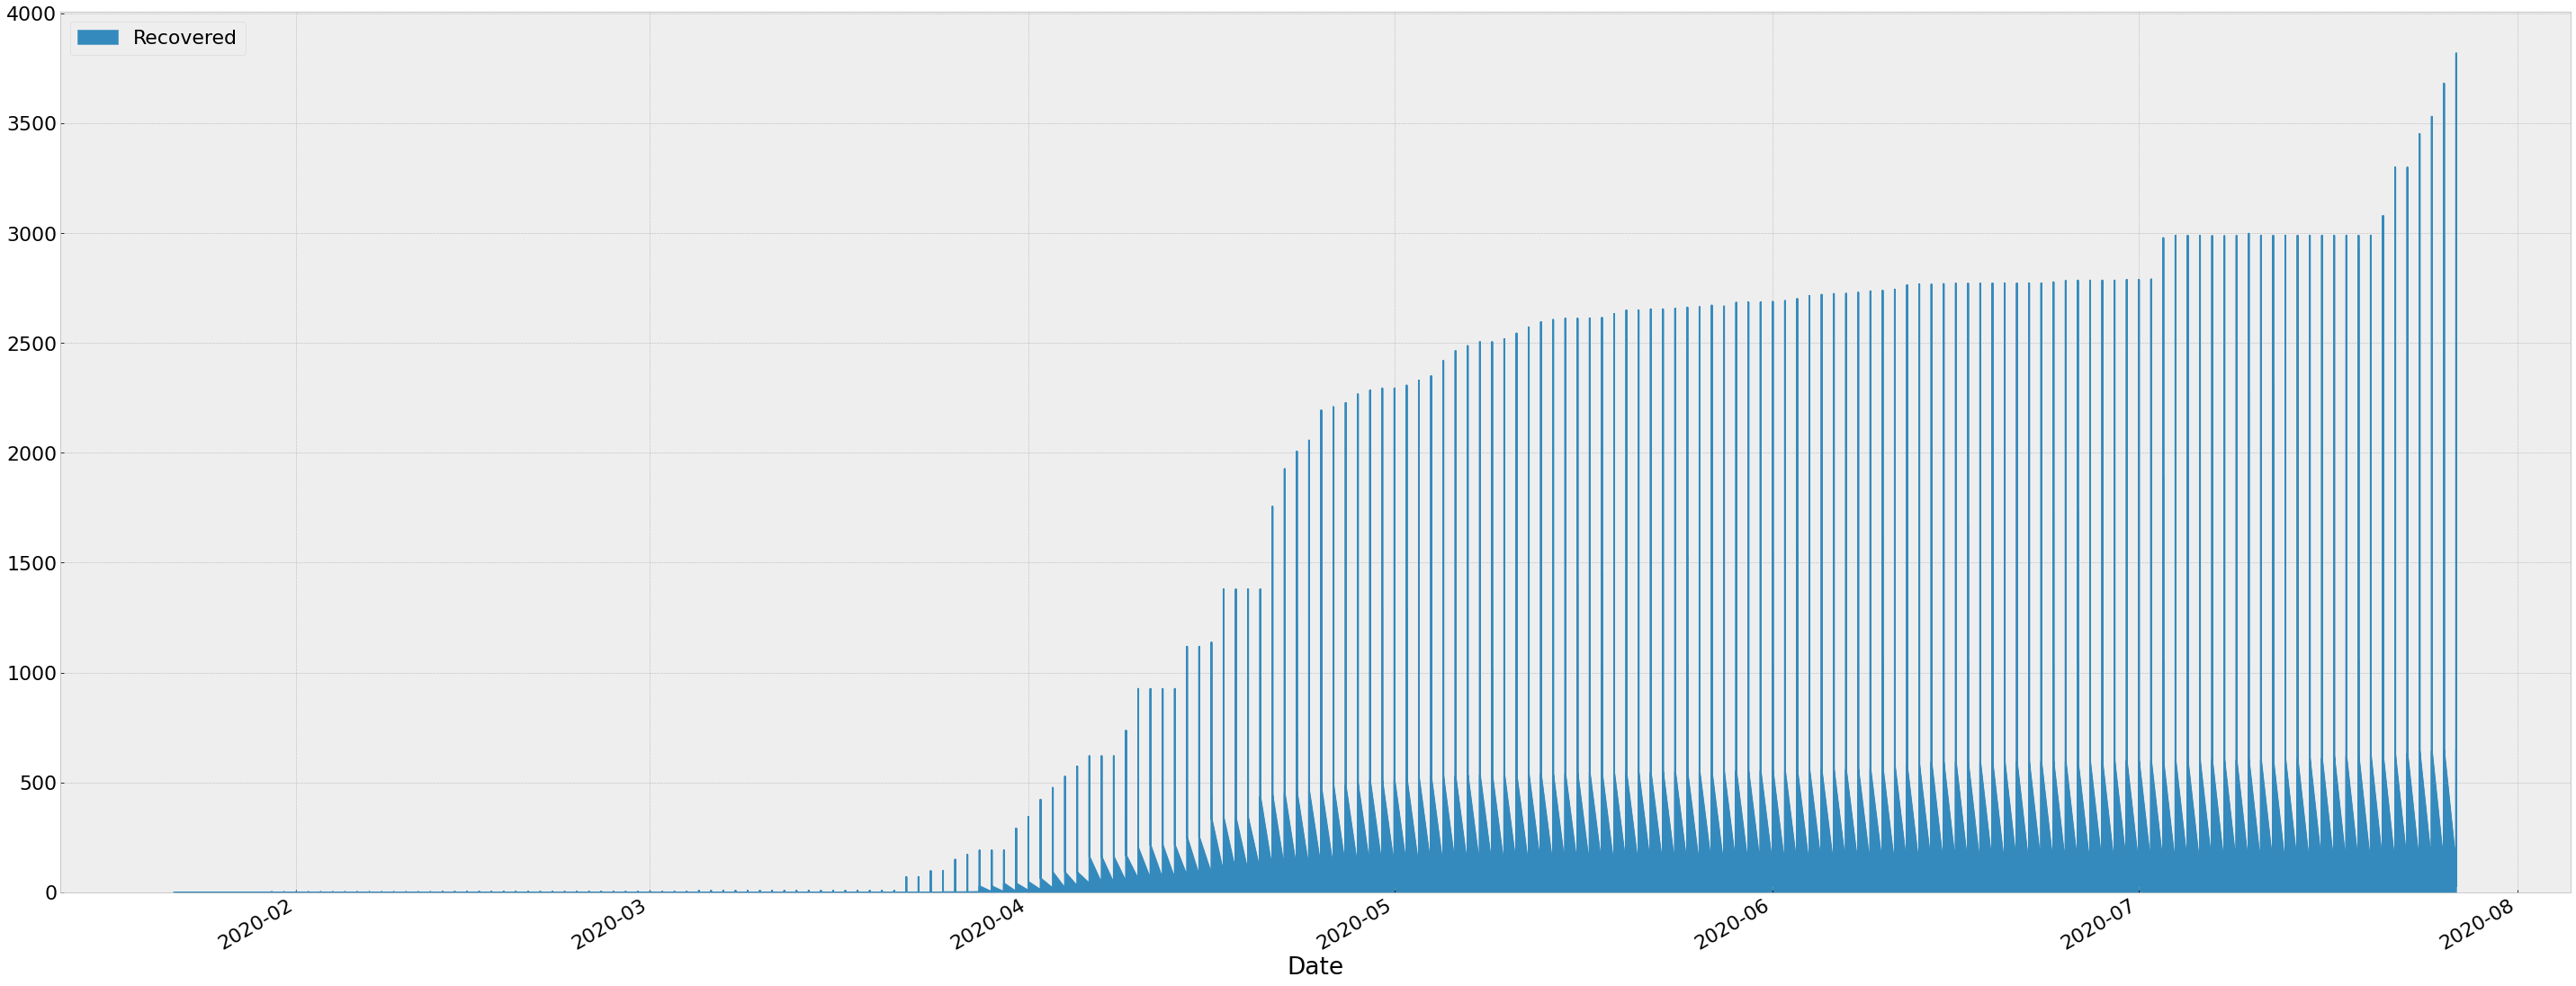

In [80]:
#Representation of the area (recovered) over time
Australia.plot.area(y='Recovered')

<AxesSubplot:xlabel='Date'>

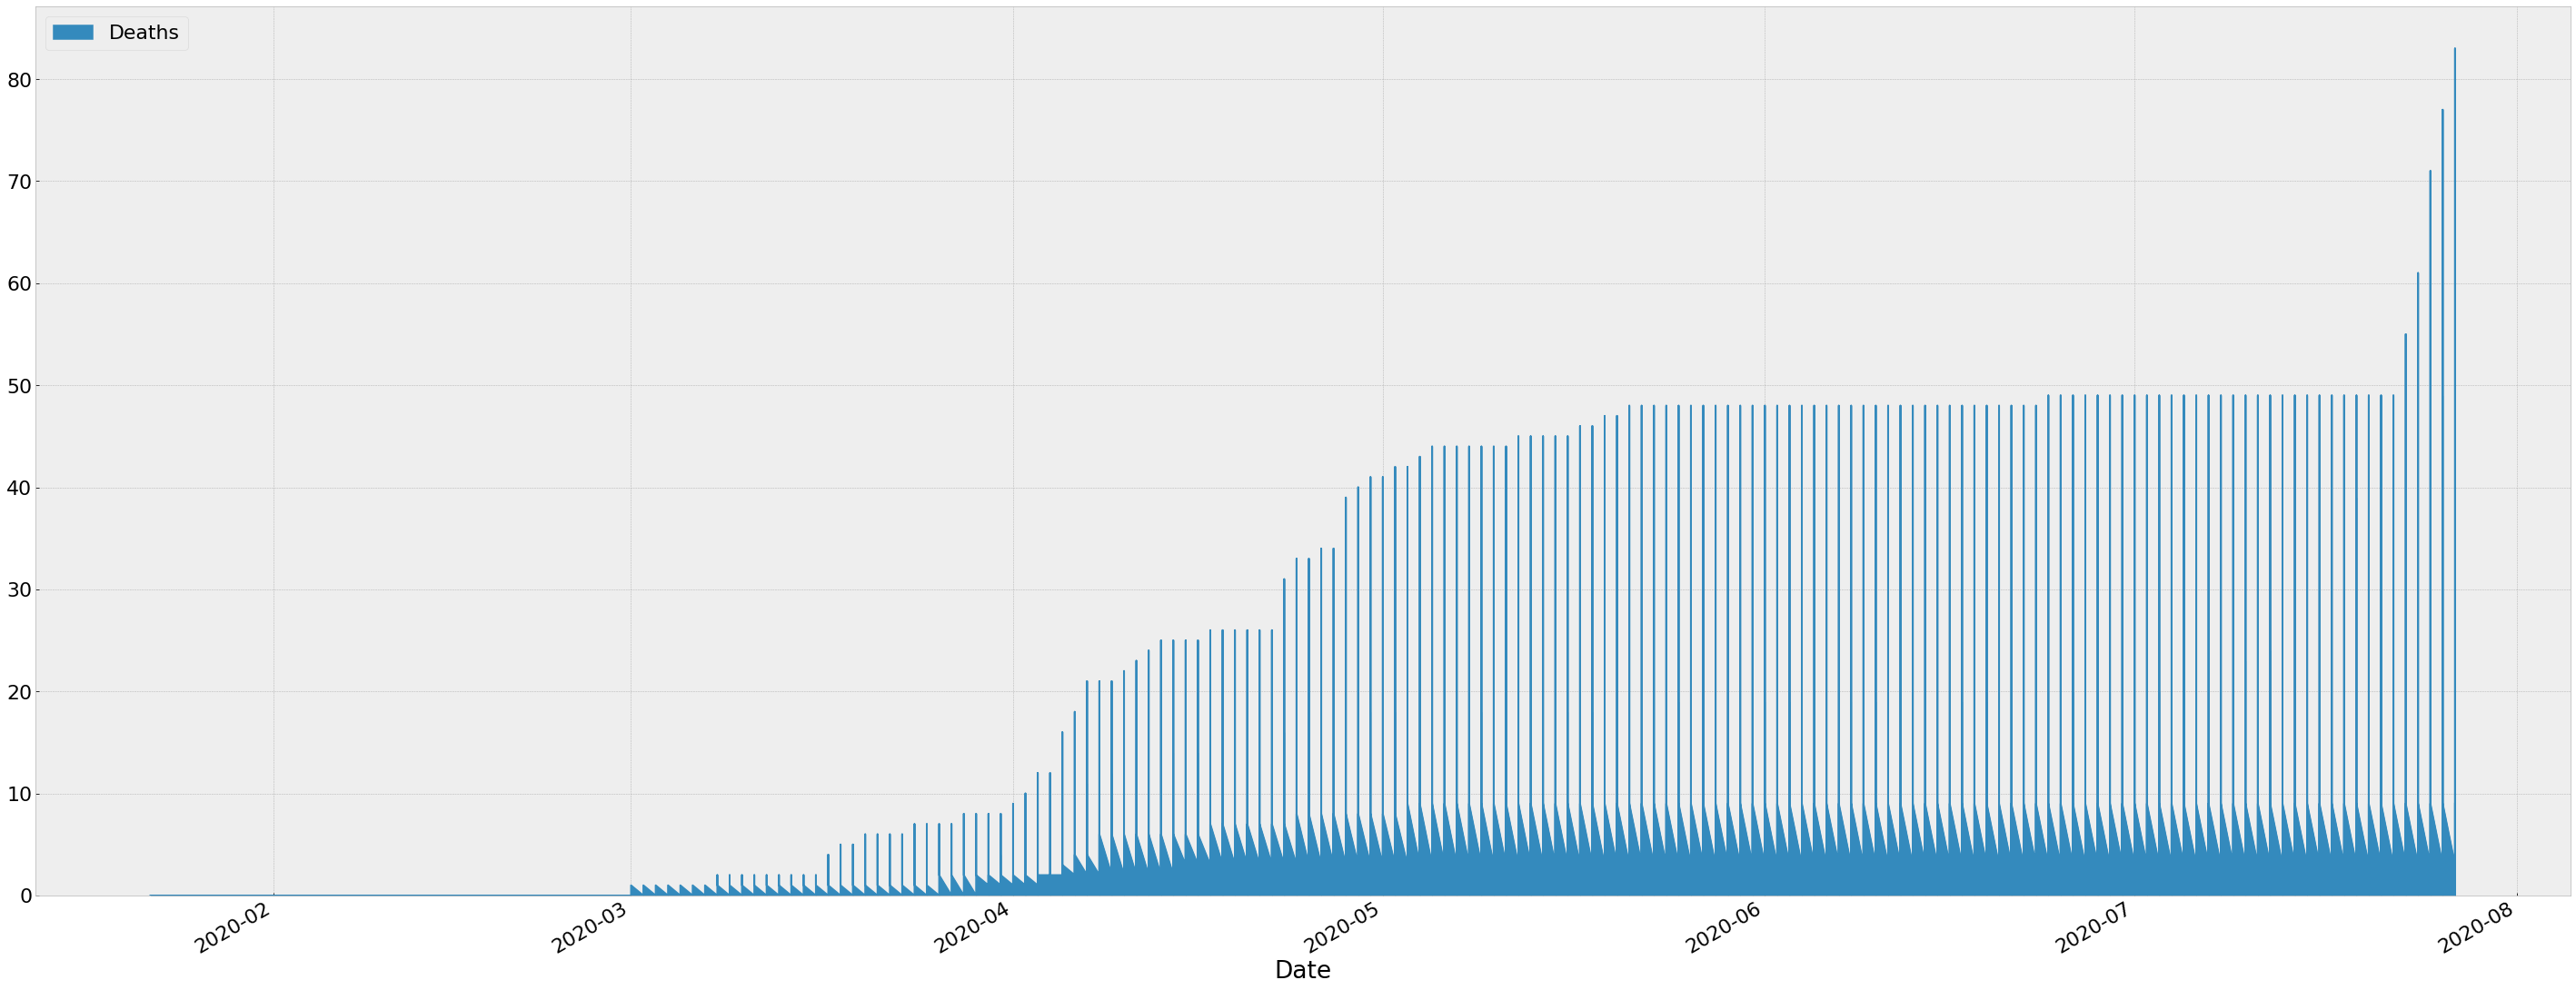

In [81]:
#Representation of the area (Deaths) over time
Australia.plot.area(y='Deaths')

<AxesSubplot:xlabel='Date'>

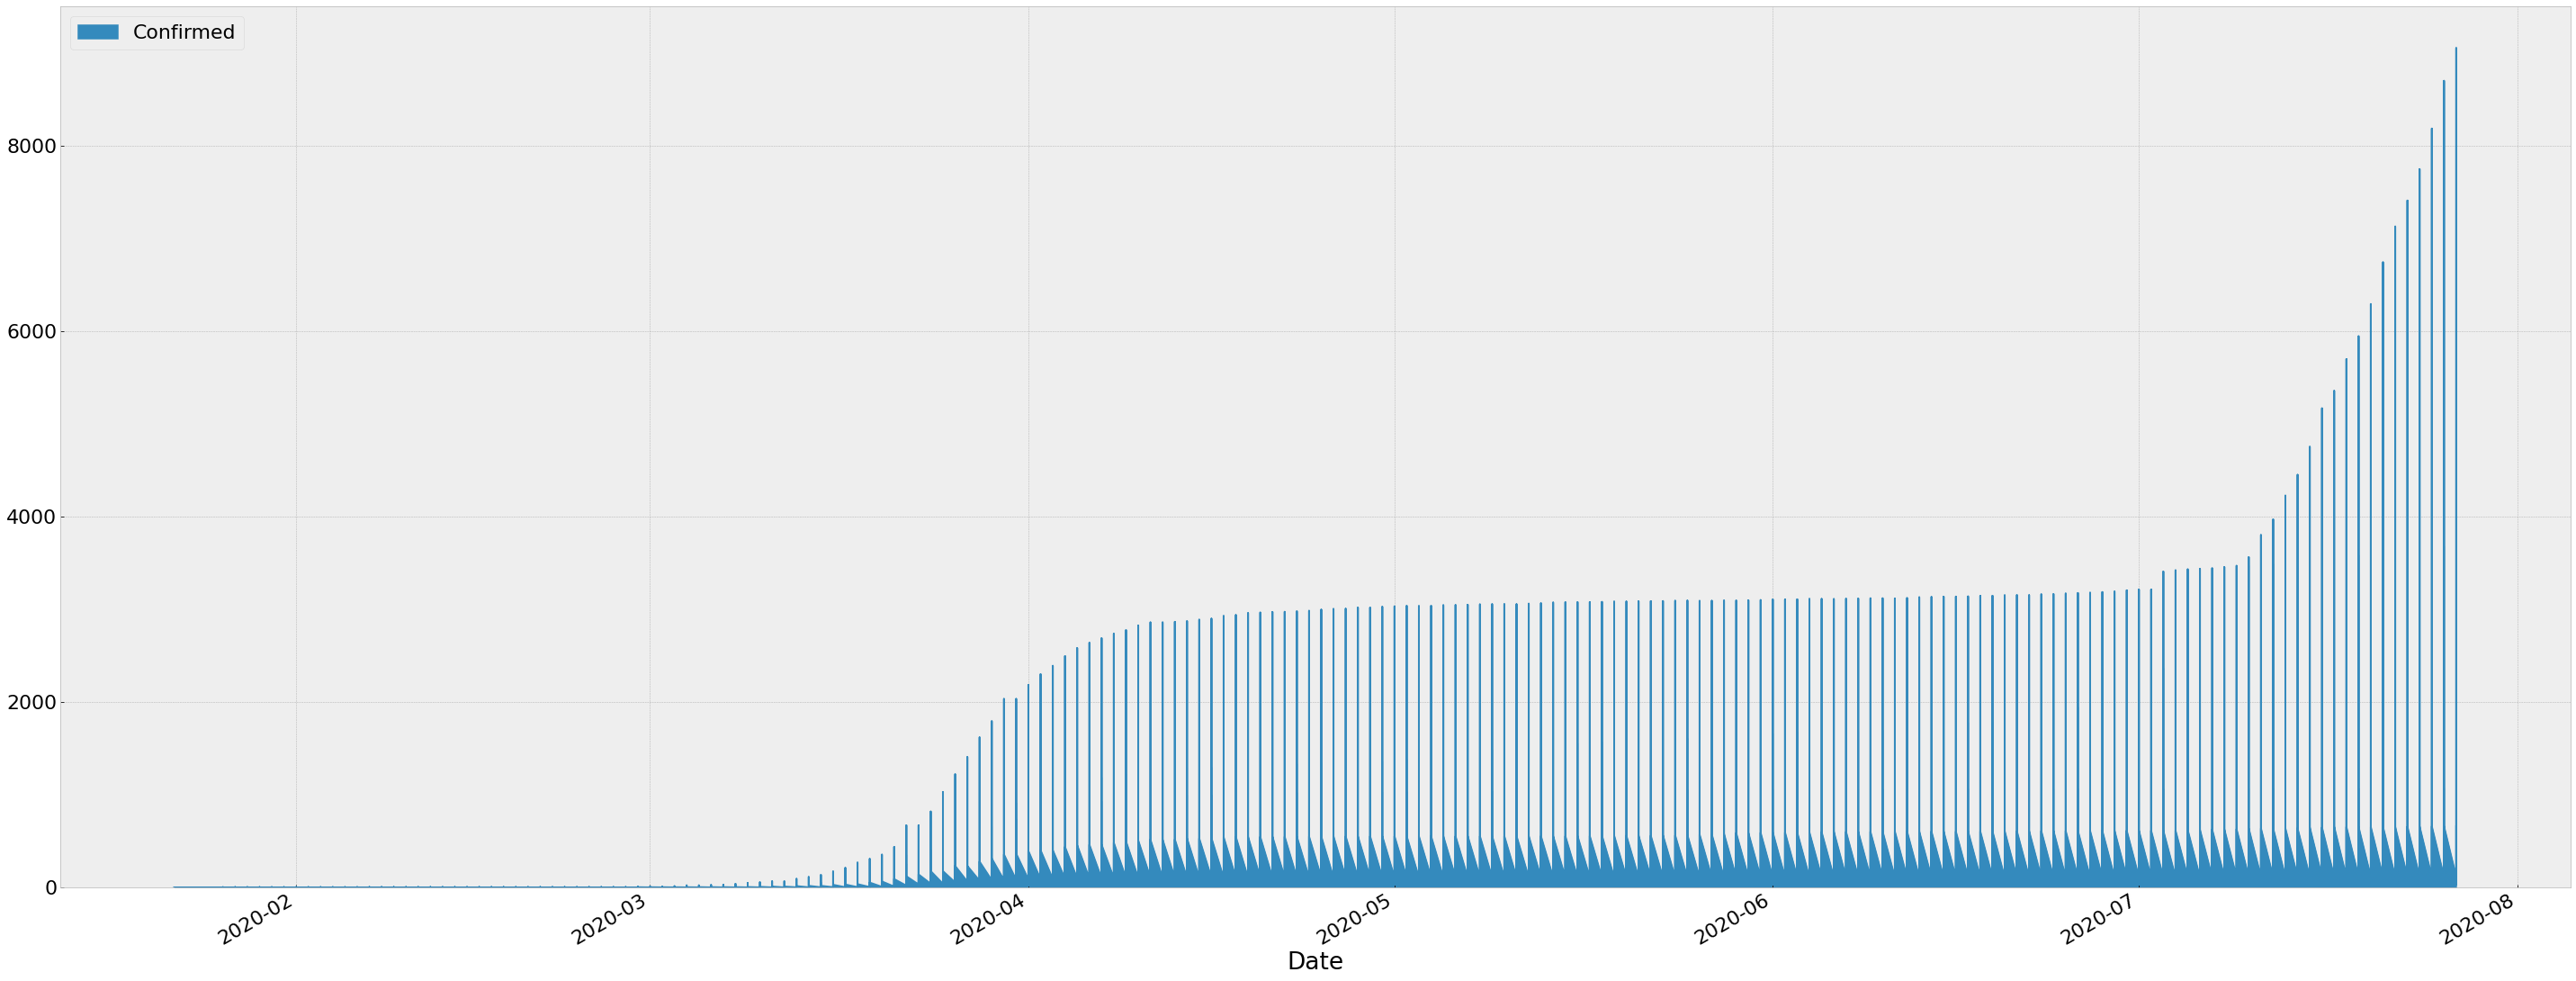

In [82]:
#Representation of the area (Confirmed) over time
Australia.plot.area(y='Confirmed')

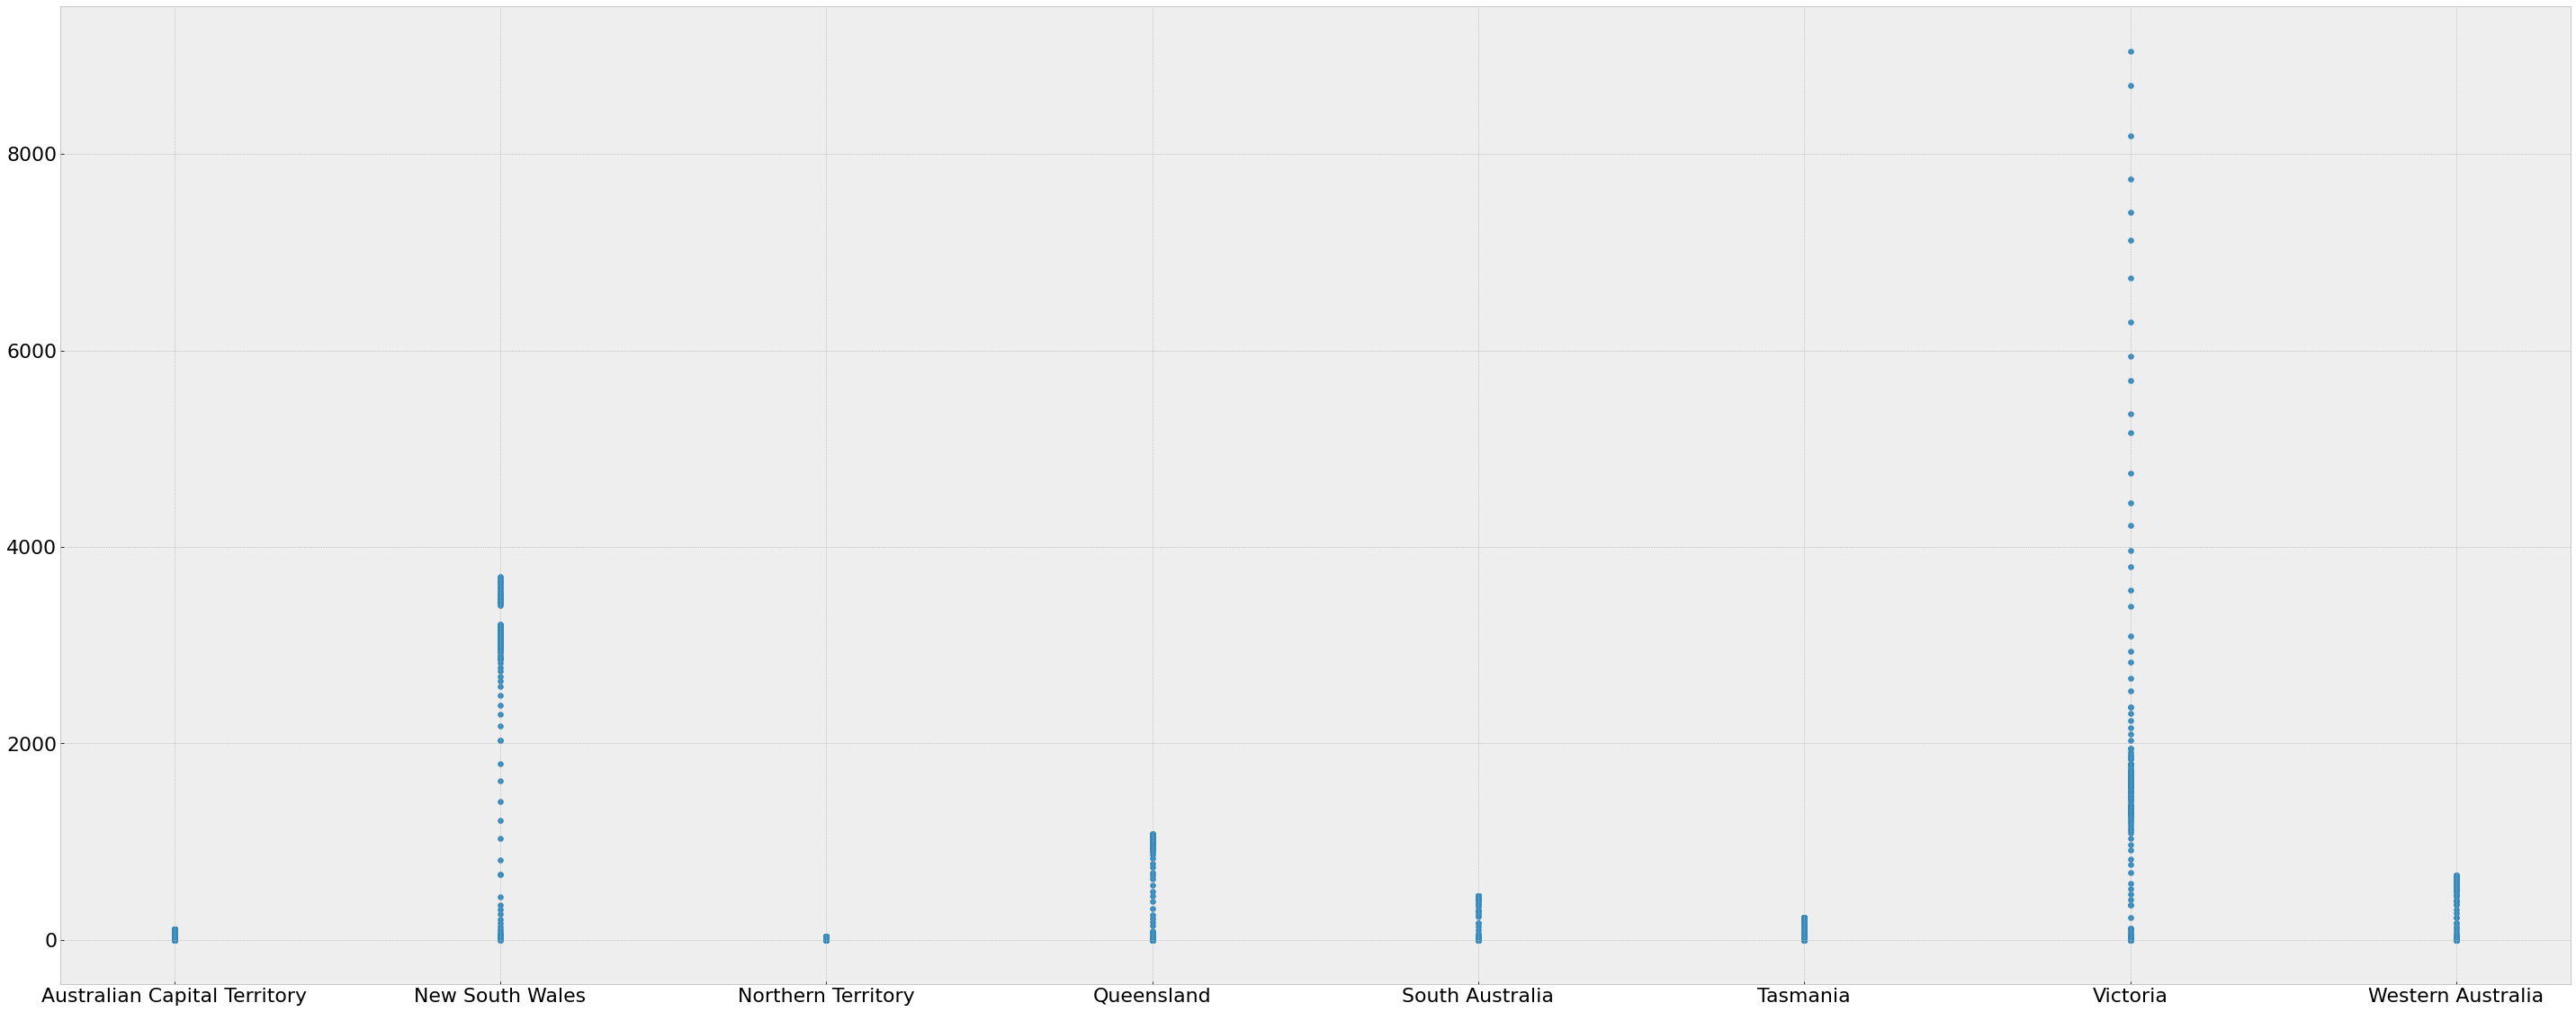

<Figure size 7200x3600 with 0 Axes>

<Figure size 7200x3600 with 0 Axes>

In [83]:
#Using scatter to compare (Province/State) with (Confirmed)
plt.scatter((Australia['Province/State'][:]),Australia['Confirmed'][:])
plt.show()
plt.figure(figsize=(100,50))

In [84]:
Australia

Province/State Country/Region      Lat      Long  \
Date                                                                         
2020-01-22  Australian Capital Territory      Australia -35.4735  149.0124   
2020-01-22               New South Wales      Australia -33.8688  151.2093   
2020-01-22            Northern Territory      Australia -12.4634  130.8456   
2020-01-22                    Queensland      Australia -27.4698  153.0251   
2020-01-22               South Australia      Australia -34.9285  138.6007   
...                                  ...            ...      ...       ...   
2020-07-27                    Queensland      Australia -27.4698  153.0251   
2020-07-27               South Australia      Australia -34.9285  138.6007   
2020-07-27                      Tasmania      Australia -42.8821  147.3272   
2020-07-27                      Victoria      Australia -37.8136  144.9631   
2020-07-27             Western Australia      Australia -31.9505  115.8605   

                 Date  Confirmed  Deaths  Recovered  Active       WHO Region  
Date                                                                          
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
2020-01-22 2020-01-22          0       0          0       0  Western Pacific  
...               ...        ...     ...        ...     ...              ...  
2020-07-27 2020-07-27       1076       6       1063       7  Western Pacific  
2020-07-27 2020-07-27        447       4        441       2  Western Pacific  
2020-07-27 2020-07-27        229      13        215       1  Western Pacific  
2020-07-27 2020-07-27       9049      83       3817    5149  Western Pacific  
2020-07-27 2020-07-27        659       9        647       3  Western Pacific  

[1504 rows x 10 columns]

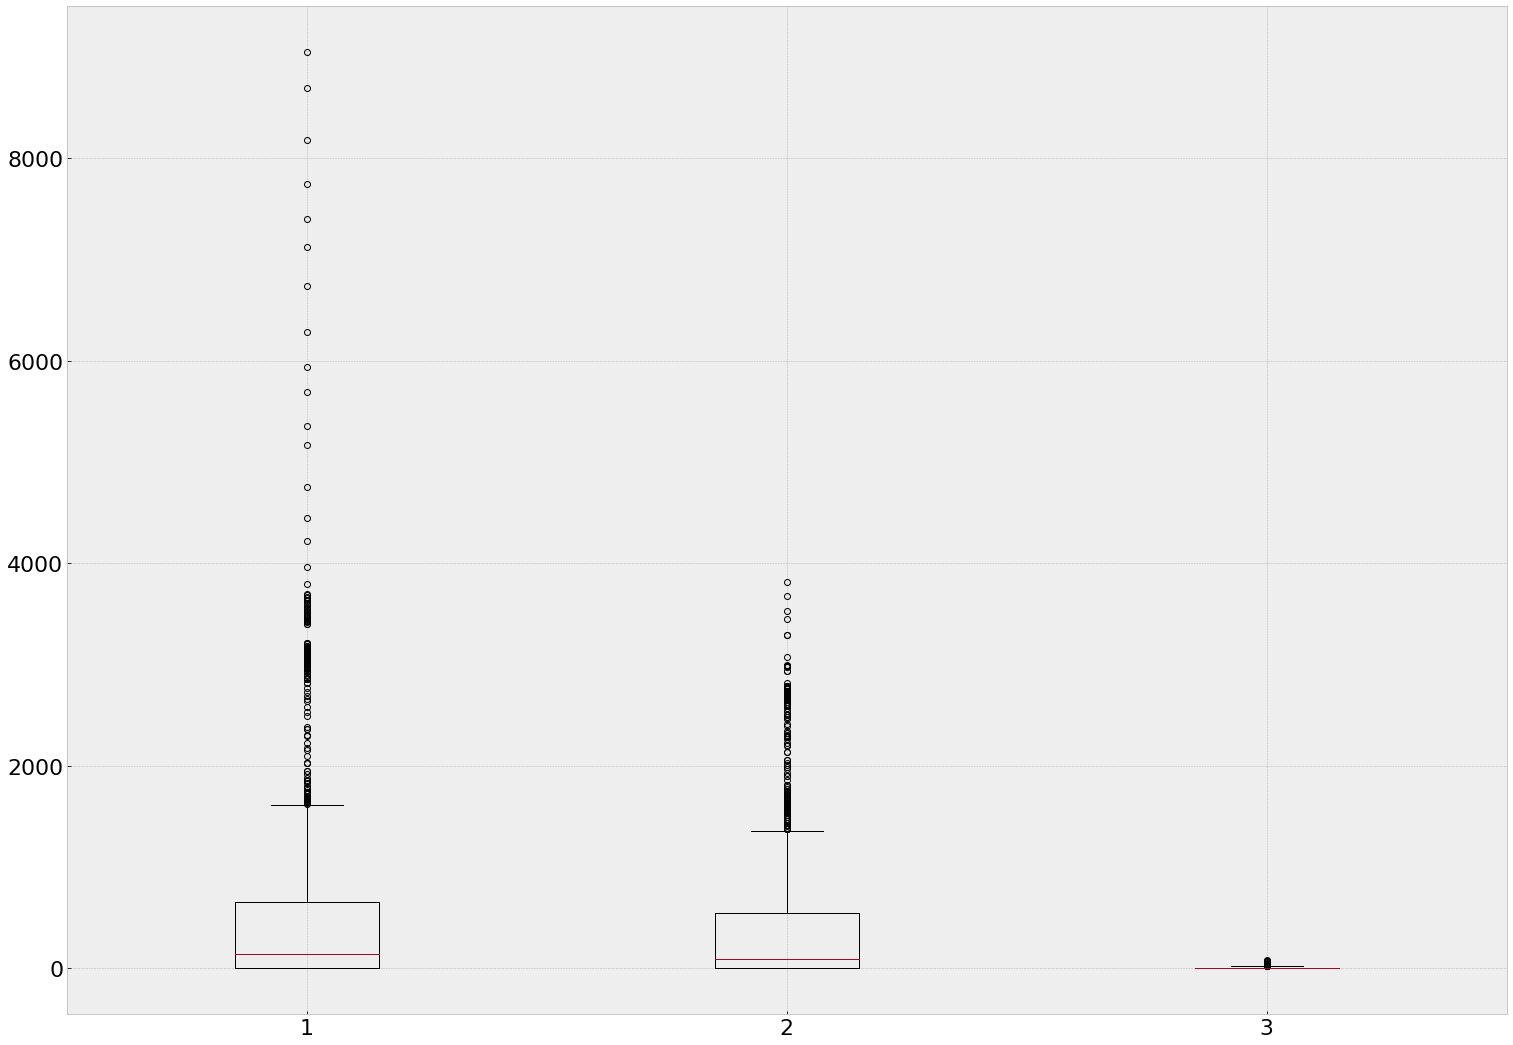

In [85]:
data = [Australia["Confirmed"], Australia["Recovered"], Australia["Deaths"]]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([1, 1, 2, 2])
bp = ax.boxplot(data)
plt.show()

In [86]:
##############################################